# Attrition in an Organization || Why Workers Quit?

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

1. Expensive in terms of both money and time to train new employees.
1. Loss of experienced employees
1. Impact in productivity
1. Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

### Business questions to brainstorm:
1. What factors are contributing more to employee attrition?
1. What type of measures should the company take in order to retain their employees?
1. What business value does the model bring?
1. Will the model save lots of money?
1. Which business unit faces the attrition problem?

In [1]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,make_scorer,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import f1_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn import metrics
import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

# IBM-HR Analytics Employee Attrition and Performance Dataset

In [2]:
#Read the data
attr=pd.read_csv('HR-Employee-Attrition.csv')
attr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
#Checking for number of rows and columns
attr.shape

(1470, 35)

In [4]:
#Checking for Null Values
attr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

From above we can infer that we have no null values in our dataset.

In [5]:
#Checking for description of dataset
attr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [6]:
#Checking for numerical and categorical features
attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

# Exploratory Data Analysis

In [7]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
attr["Attrition"] = label.fit_transform(attr.Attrition)

In [8]:
#Checking for unique calues <=30 in the categorical columns
col=[]
for i in attr.columns:
    if attr[i].dtype==object and len(attr[i].unique())<=30:
        col.append(attr[i])
        print(attr[i].value_counts())
        print('-------')

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-------
Male      882
Female    588
Name: Gender, dtype: int64
-------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
-------
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
-------
Y    1470
Name: Over18, dtype: int64
-------
No     1054
Yes     416
Name: Ov

In [9]:
for i in attr.columns:
    print(f"{i}: Number of unique values {attr[i].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We will drop EmployeeCount,StandardHours features,Over18 it has only 1 unique value and EmployeeNumber has 1470 unique values which will not effect analysis of our Employee Attrition

In [10]:
#Dropping the above mentioned features
attr=attr.drop(columns=['EmployeeCount','StandardHours','EmployeeNumber','Over18'],axis=1)

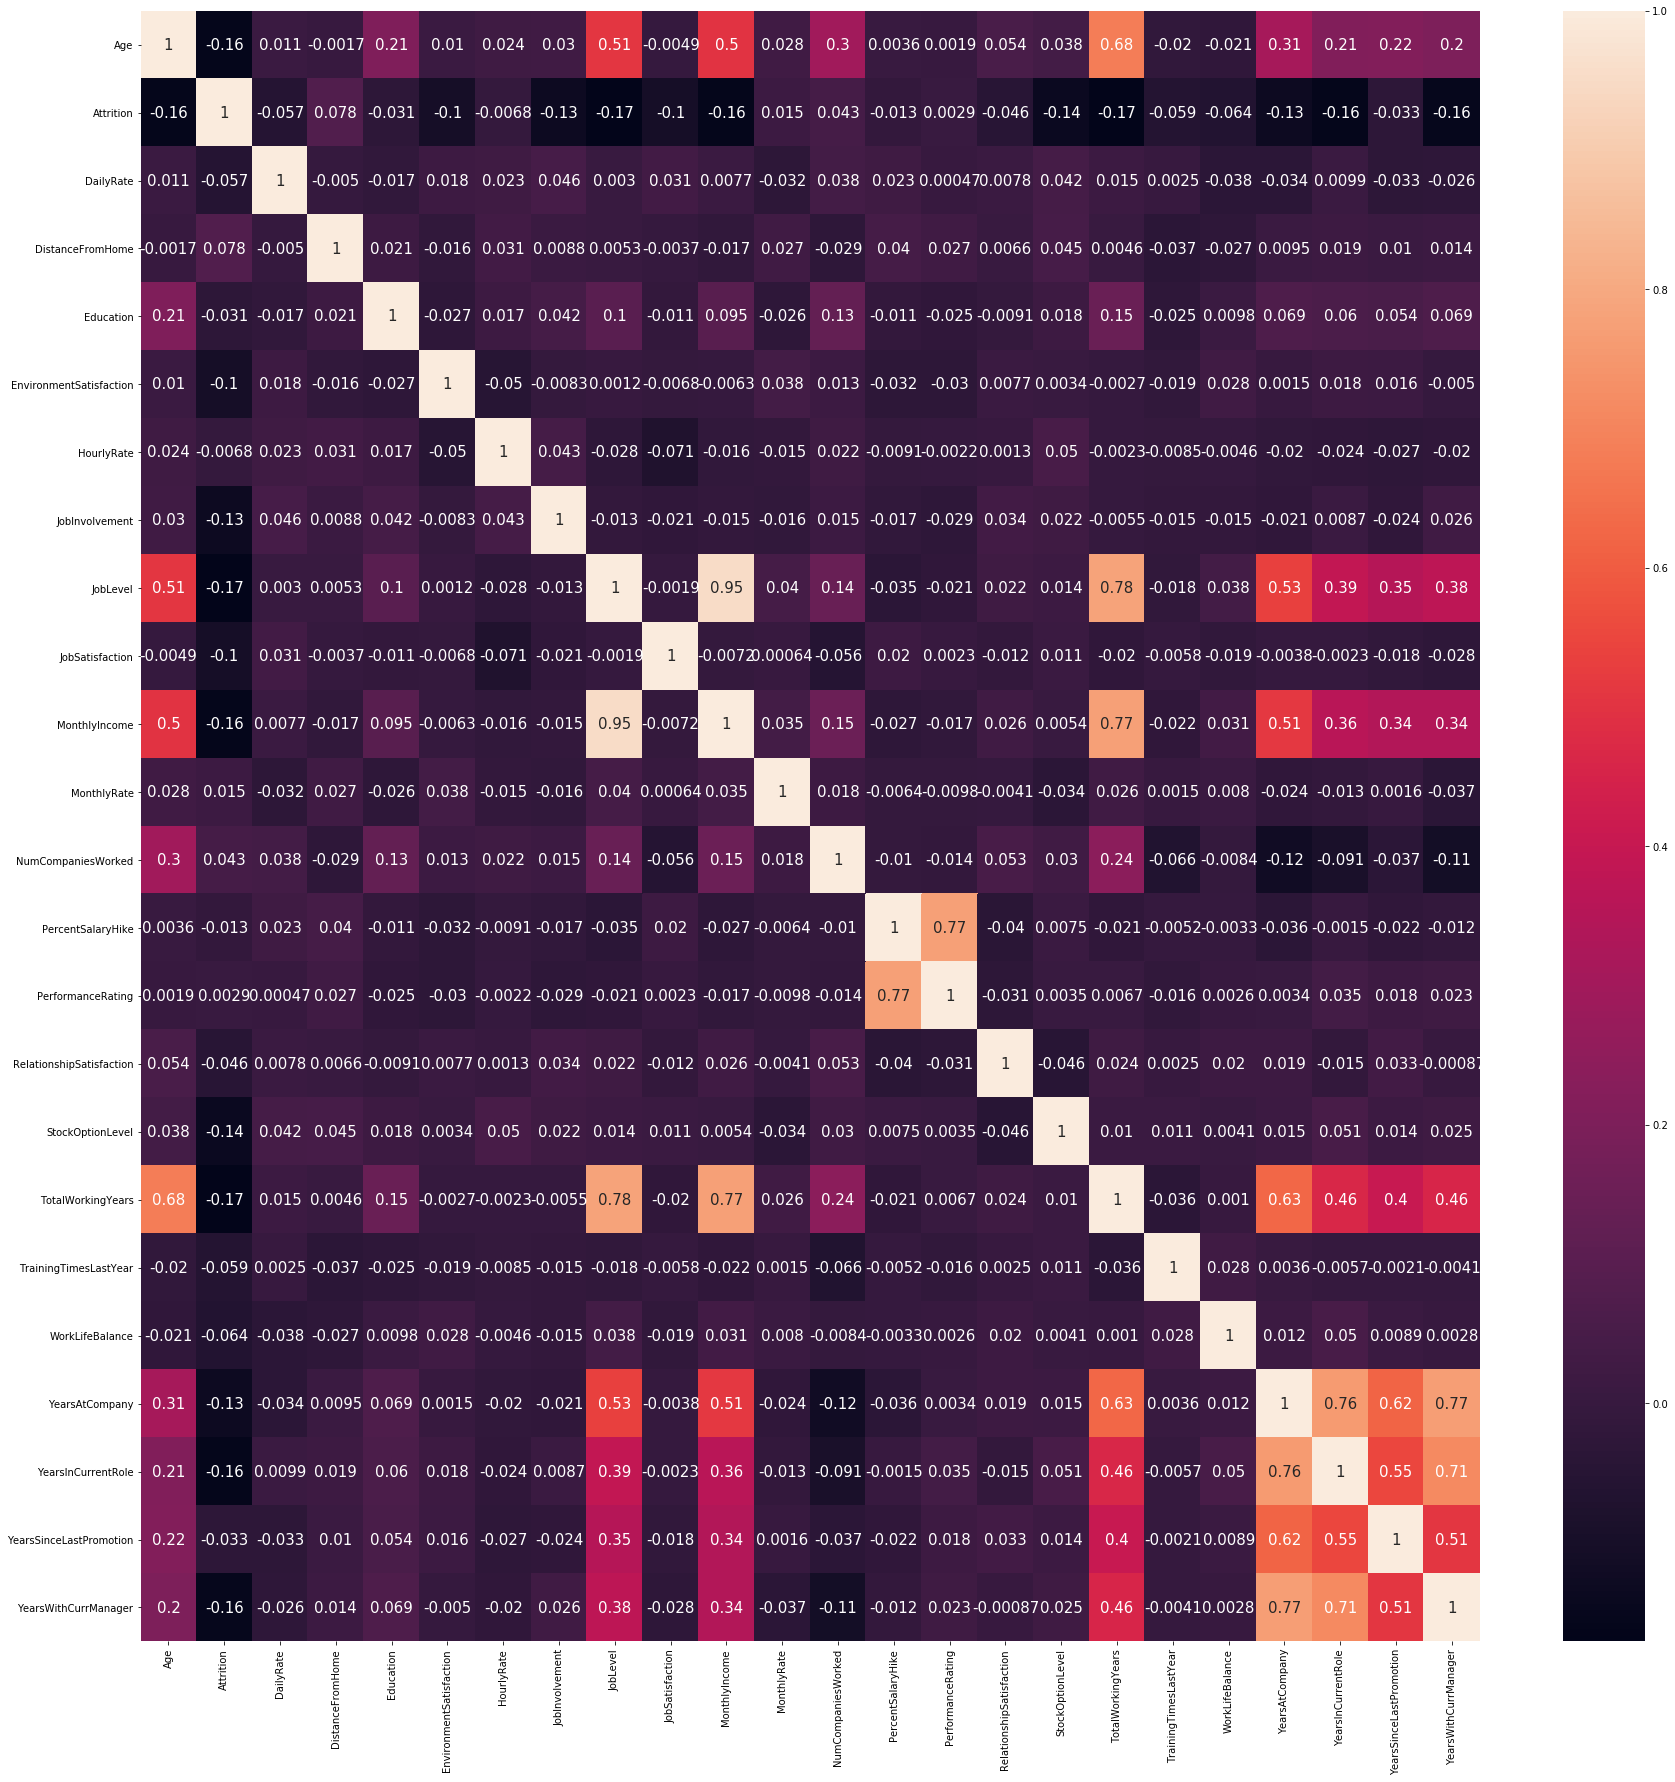

In [11]:
fig,ax=plt.subplots(figsize=(30, 30))
sns.heatmap(attr.corr(), annot=True, annot_kws={"size":15})
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

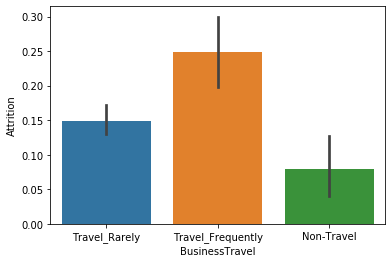

In [12]:
sns.barplot(attr['BusinessTravel'],attr['Attrition'])
plt.show()

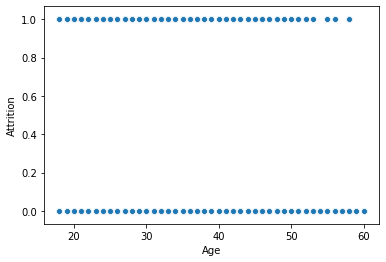

In [13]:
sns.scatterplot(attr['Age'],attr['Attrition'])
plt.show()

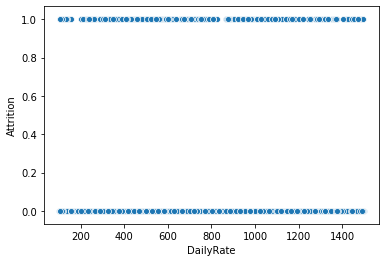

In [14]:
sns.scatterplot(attr['DailyRate'],attr['Attrition'])
plt.show()

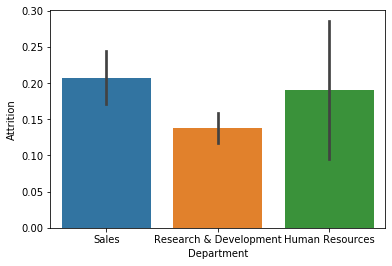

In [15]:
sns.barplot(attr['Department'],attr['Attrition'])
plt.show()

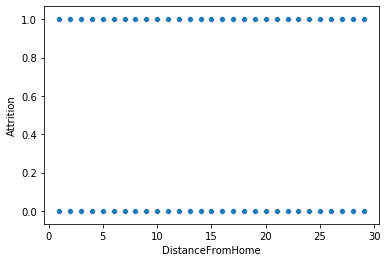

In [16]:
sns.scatterplot(attr['DistanceFromHome'],attr['Attrition'])
plt.show()

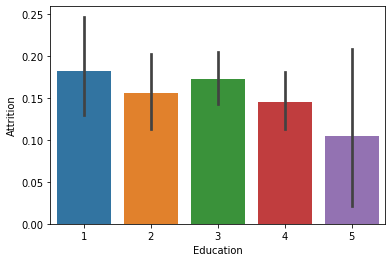

In [17]:
sns.barplot(attr['Education'],attr['Attrition'])
plt.show()

Here 1,2,3,4,5 stands for BelowCollege,College,Bachelor,Master,Doctor respectively.

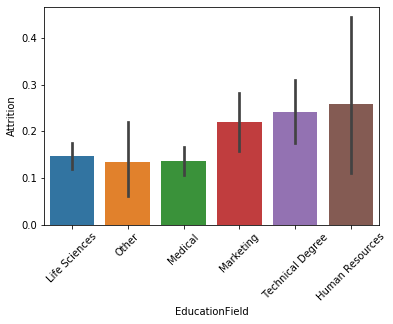

In [18]:
chart=sns.barplot(attr['EducationField'],attr['Attrition'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

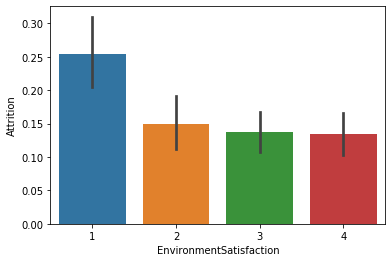

In [19]:
sns.barplot(attr['EnvironmentSatisfaction'],attr['Attrition'])
plt.show()

Here 1 stands for Low, 2 for Medium, 3 for High, 4 for Very High

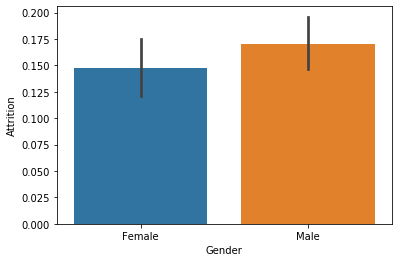

In [20]:
sns.barplot(attr['Gender'],attr['Attrition'])
plt.show()

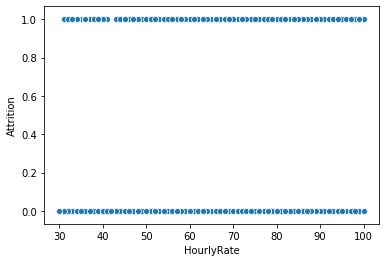

In [21]:
sns.scatterplot(attr['HourlyRate'],attr['Attrition'])
plt.show()

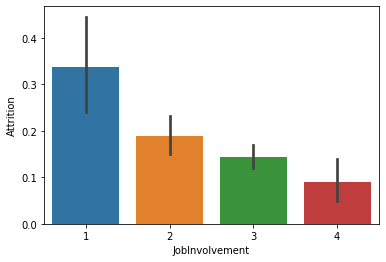

In [22]:
sns.barplot(attr['JobInvolvement'],attr['Attrition'])
plt.show()

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

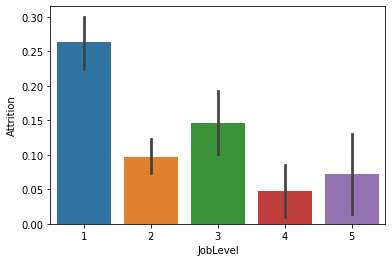

In [23]:
sns.barplot(attr['JobLevel'],attr['Attrition'])
plt.show()

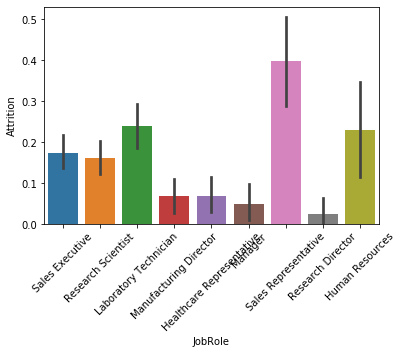

In [24]:
chart=sns.barplot(attr['JobRole'],attr['Attrition'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

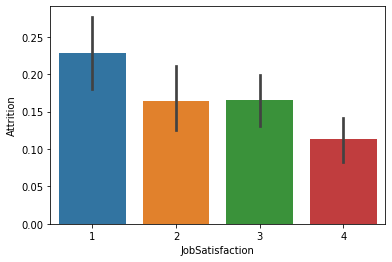

In [25]:
sns.barplot(attr['JobSatisfaction'],attr['Attrition'])
plt.show()

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

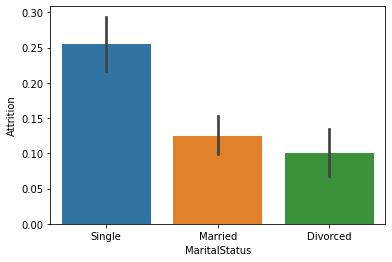

In [26]:
sns.barplot(attr['MaritalStatus'],attr['Attrition'])
plt.show()

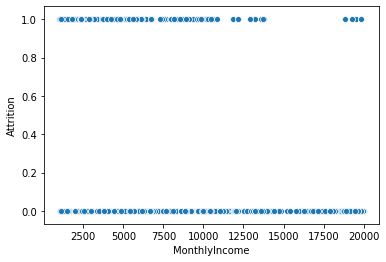

In [27]:
sns.scatterplot(attr['MonthlyIncome'],attr['Attrition'])
plt.show()

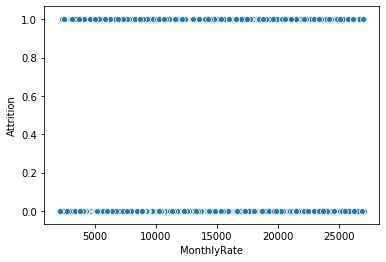

In [28]:
sns.scatterplot(attr['MonthlyRate'],attr['Attrition'])
plt.show()

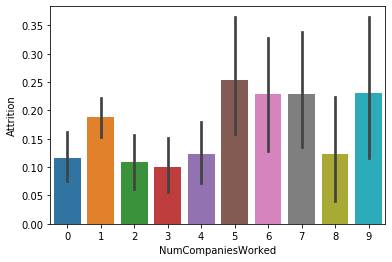

In [29]:
sns.barplot(attr['NumCompaniesWorked'],attr['Attrition'])
plt.show()

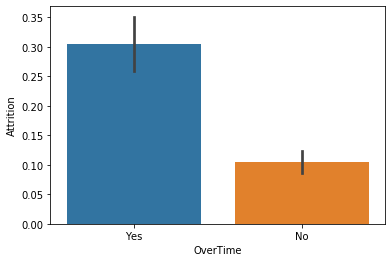

In [30]:
sns.barplot(attr['OverTime'],attr['Attrition'])
plt.show()

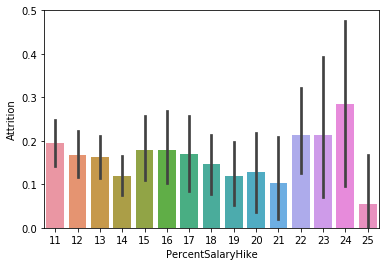

In [31]:
sns.barplot(attr['PercentSalaryHike'],attr['Attrition'])
plt.show()

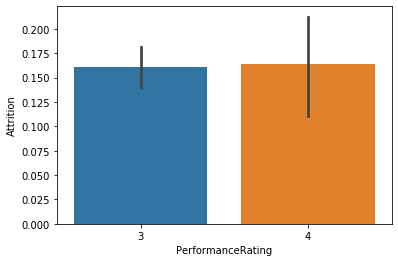

In [32]:
sns.barplot(attr['PerformanceRating'],attr['Attrition'])
plt.show()

PerformanceRating
3 'Excellent'
4 'Outstanding'

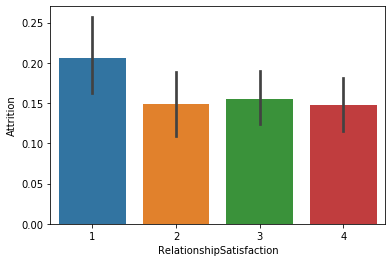

In [33]:
sns.barplot(attr['RelationshipSatisfaction'],attr['Attrition'])
plt.show()

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

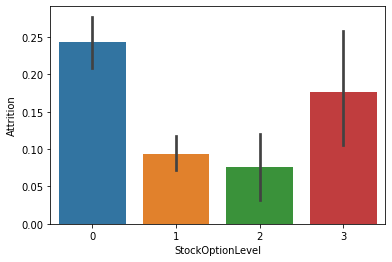

In [34]:
sns.barplot(attr['StockOptionLevel'],attr['Attrition'])
plt.show()

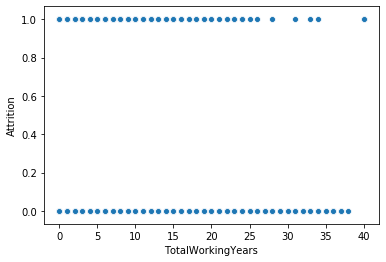

In [35]:
sns.scatterplot(attr['TotalWorkingYears'],attr['Attrition'])
plt.show()

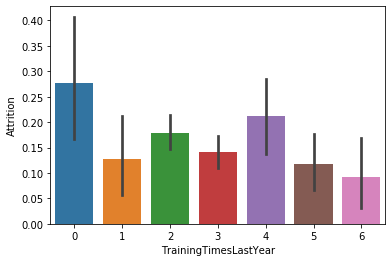

In [36]:
sns.barplot(attr['TrainingTimesLastYear'],attr['Attrition'])
plt.show()

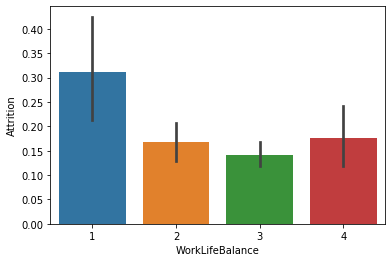

In [37]:
sns.barplot(attr['WorkLifeBalance'],attr['Attrition'])
plt.show()

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

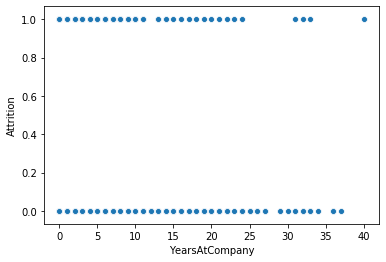

In [38]:
sns.scatterplot(attr['YearsAtCompany'],attr['Attrition'])
plt.show()

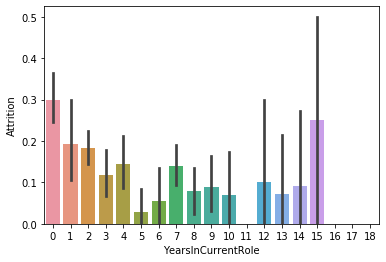

In [39]:
sns.barplot(attr['YearsInCurrentRole'],attr['Attrition'])
plt.show()

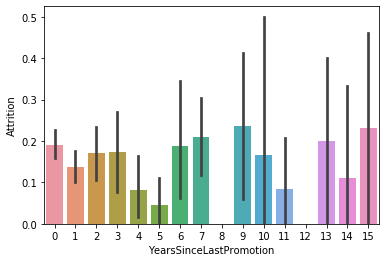

In [40]:
sns.barplot(attr['YearsSinceLastPromotion'],attr['Attrition'])
plt.show()

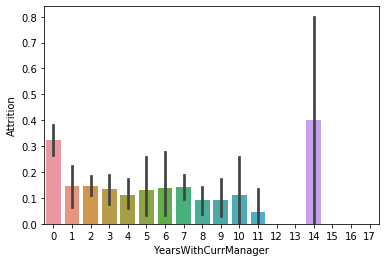

In [41]:
sns.barplot(attr['YearsWithCurrManager'],attr['Attrition'])
plt.show()

# Performing Statistical Test To check the Feature Importance

In [42]:
#We will carry out Chi-Square (Test Of Independence) here between the two categorical features
#H0: The two features are independent of each other
#H1: The two features are dependent on each other
cat_col=[]
for i in attr.columns:
    if ((attr[i].nunique())<=10):
        cat_col.append(i)
cat_col.remove('Attrition')
for i in cat_col:
    Test=pd.crosstab(attr['Attrition'],attr[i])
    chi2,p,dof,expected=chi2_contingency(Test)
    if(p<0.05):
        print(f"{i}: Significant Feature with P-value:- ",p)
    else:
        print(f"{i}: Not Significant Feature with P-value:-  ",p)

BusinessTravel: Significant Feature with P-value:-  5.608614476449931e-06
Department: Significant Feature with P-value:-  0.004525606574479633
Education: Not Significant Feature with P-value:-   0.5455253376565949
EducationField: Significant Feature with P-value:-  0.006773980139025222
EnvironmentSatisfaction: Significant Feature with P-value:-  5.1234689062894205e-05
Gender: Not Significant Feature with P-value:-   0.29057244902890855
JobInvolvement: Significant Feature with P-value:-  2.8631806367134195e-06
JobLevel: Significant Feature with P-value:-  6.634684715458909e-15
JobRole: Significant Feature with P-value:-  2.752481638050657e-15
JobSatisfaction: Significant Feature with P-value:-  0.0005563004510387556
MaritalStatus: Significant Feature with P-value:-  9.45551106034083e-11
NumCompaniesWorked: Significant Feature with P-value:-  0.002249178294685049
OverTime: Significant Feature with P-value:-  8.15842372153832e-21
PerformanceRating: Not Significant Feature with P-value:-  

In [43]:
numeric_cols=[]
for j in attr.columns:
    if ((attr[j].nunique())>10):
        numeric_cols.append(j)
for j in numeric_cols:
    tstat,p_value=ttest_ind(attr[attr['Attrition']==1][j],attr[attr['Attrition']==0][j])
    if(p_value<0.05):
        print(f"{j}: Significant Feature with P-value:- ",p_value)
    else:
        print(f"{j}: Not Significant Feature with P-value:- ",p_value)

Age: Significant Feature with P-value:-  8.356308021103649e-10
DailyRate: Significant Feature with P-value:-  0.02985816066026497
DistanceFromHome: Significant Feature with P-value:-  0.0027930600802134266
HourlyRate: Not Significant Feature with P-value:-  0.7931347689944243
MonthlyIncome: Significant Feature with P-value:-  7.14736398535381e-10
MonthlyRate: Not Significant Feature with P-value:-  0.5611235982243015
PercentSalaryHike: Not Significant Feature with P-value:-  0.6056128238893757
TotalWorkingYears: Significant Feature with P-value:-  4.0618781112668525e-11
YearsAtCompany: Significant Feature with P-value:-  2.3188716103863033e-07
YearsInCurrentRole: Significant Feature with P-value:-  6.003185843641377e-10
YearsSinceLastPromotion: Not Significant Feature with P-value:-  0.2057899591624936
YearsWithCurrManager: Significant Feature with P-value:-  1.7369867845242207e-09


From the above tests performed we can come to an conclusion that the features that we selected from Exploratory Data Analysis
are Significant becuase when we performed Statistical Tests the same columns turned out to be Significant.
Next we will drop the Non-Significant features.

In [44]:
attr_new=attr.drop(columns=['Education','Gender','PerformanceRating','RelationshipSatisfaction','HourlyRate','MonthlyRate',
                           'PercentSalaryHike','YearsSinceLastPromotion'])

In [45]:
attr_new.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Froma above we can see that our target column is highly imbalanced.
So before making the target balanced we will make a base model with imbalanced class and we will try to 
improve our score further.

In [46]:
attr_new.head()
pd.set_option('max_columns',None)
attr_new

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome EducationField  EnvironmentSatisfaction  \
0                    1  Life Sciences                        2   
1                    8  Life Sciences                        3   
2                    2          Other                        4   
3                    3  Life Sciences                        4   
4                    2        Medical                        1   
...                ...            ...                      ...   
1465                23        Medical                        3   
1466                 6        Medical                        4   
1467                 4  Life Sciences                        2   
1468                 2        Medical                        4   
1469                 8        Medical                        2   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  NumCompaniesWorked OverTime  \
0           Single           5993                   8      Yes   
1          Married           5130                   1       No   
2           Single           2090                   6      Yes   
3          Married           2909                   1      Yes   
4          Married           3468                   9       No   
...            ...            ...                 ...      ...   
1465       Married           2571                   4       No   
1466       Married           9991                   4       No   
1467       Married           6142                   1      Yes   
1468       Married           5390                   2       No   
1469       Married           4404                   2       No   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
14

In [47]:
attr_new_dummies=pd.get_dummies(attr_new,columns=['BusinessTravel','Department','EducationField','EnvironmentSatisfaction',
                                 'JobSatisfaction','JobLevel','JobInvolvement','OverTime','JobRole',
                                'WorkLifeBalance','MaritalStatus'],drop_first=True)

# Base Model with Imbalanced Class

In [88]:
X=attr_new_dummies.drop('Attrition',axis=1)
y=attr_new_dummies['Attrition']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,stratify=y,random_state = 42)
attr_new_dummies['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [49]:
def base_model(model1):
    if model1=='knn1' or model1=='lr1':
        std_scale = StandardScaler()
        X_train_scaled = std_scale.fit_transform(Xtrain)
        X_test_scaled = std_scale.transform(Xtest)
        model1.fit(X_train_scaled,ytrain)
        y_predict    = model1.predict(X_test_scaled)
        accuracy_imb = model1.score(X_test_std, ytest).round(2)
        precision_imb= precision_score(ytest, y_predict).round(2) 
        recall_imb   = recall_score(ytest, y_predict).round(2) 
        f1_imb       = f1_score(ytest, y_predict).round(2)
    else:
        model1.fit(Xtrain,ytrain)
        y_predict    = model1.predict(Xtest)
        accuracy_imb = model1.score(Xtest, ytest).round(2)
        precision_imb= precision_score(ytest, y_predict).round(2) 
        recall_imb   = recall_score(ytest, y_predict).round(2) 
        f1_imb       = f1_score(ytest, y_predict).round(2)
            
    return(accuracy_imb,precision_imb,recall_imb,f1_imb)   

In [50]:
lr1=LogisticRegression(random_state=42,n_jobs=-1)
rf=RandomForestClassifier(random_state=42)
dt=DecisionTreeClassifier(random_state=42)
knn1=KNeighborsClassifier(n_jobs=-1)
nb=GaussianNB()

In [51]:
models=[]
models.append(('Logistic Regression',lr1))
models.append(('Decision Tree',dt))
models.append(('Random Forest',rf))
models.append(('KNN',knn1))
models.append(('Naive Bayes',nb))

In [52]:
accuracy_score=[]
precision_value=[]
recall_value=[]
f1_value=[]
name_list=[]
for name,model1 in models:
    accuracy_imb,precision_imb,recall_imb,f1_imb=base_model(model1)
    accuracy_score.append(accuracy_imb)
    precision_value.append(precision_imb)
    recall_value.append(recall_imb)
    f1_value.append(f1_imb)
    name_list.append(name)
score=pd.DataFrame({'Model_name':name_list,'Accuracy':accuracy_score,'Precision':precision_value,
                    'Recall':recall_value,'F1_Score':f1_value})
score

Model_name  Accuracy  Precision  Recall  F1_Score
0  Logistic Regression      0.82       0.27    0.06      0.10
1        Decision Tree      0.78       0.33    0.34      0.33
2        Random Forest      0.84       0.45    0.11      0.17
3                  KNN      0.82       0.27    0.09      0.13
4          Naive Bayes      0.68       0.29    0.70      0.42

Here we see that as our data is imbalanced the f1_score is very low. So we will do oversampling here by using 
SMOTE and then build our further models.

# Data Modelling with Balanced Data

In [53]:
X1 = attr_new_dummies.drop('Attrition', axis=1)
y1 = attr_new_dummies.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concatinating X_train and y_train
df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
minority_class = df[df.Attrition == 1]
#print(minority_class)
majority_class = df[df.Attrition == 0]
#print(majority_class)
minority_upsample=resample(minority_class,n_samples=majority_class.shape[0],
                           random_state=42)
df_2 = pd.concat([minority_upsample, majority_class])
X_train = df_2.drop('Attrition', axis=1)
y_train = df_2.Attrition

In [54]:
def model_evaluation(model):
    if model=='knn' or model=='lr':
        scaler = StandardScaler()
        X_train_std = scaler.fit_transform(X_train)
        X_test_std = scaler.transform(X_test)
        model.fit(X_train_std,y_train)
        y_pred   = model.predict(X_test_std)
        accuracy = model.score(X_test_std, y_test).round(2)
        precision= precision_score(y_test, y_pred).round(2) 
        recall   = recall_score(y_test, y_pred).round(2) 
        f1       = f1_score(y_test, y_pred).round(2)
         
    else:
        model.fit(X_train,y_train)
        y_pred   = model.predict(X_test)
        accuracy = model.score(X_test, y_test).round(2)
        precision= precision_score(y_test, y_pred).round(2) 
        recall   = recall_score(y_test, y_pred).round(2) 
        f1       = f1_score(y_test, y_pred).round(2)
         
    return(accuracy,precision,recall,f1)
         

In [55]:
lr=LogisticRegression(random_state=42,n_jobs=-1)
rf=RandomForestClassifier(random_state=42)
dt=DecisionTreeClassifier(random_state=42)
knn=KNeighborsClassifier(n_jobs=-1)
nb=GaussianNB()

In [56]:
models=[]
models.append(('Logistic Regression',lr))
models.append(('Decision Tree',dt))
models.append(('Random Forest',rf))
models.append(('KNN',knn))
models.append(('Naive Bayes',nb))

In [57]:
accuracy_score=[]
precision_value=[]
recall_value=[]
f1_value=[]
name_list=[]
for name,model in models:
    accuracy,precision,recall,f1=model_evaluation(model)
    accuracy_score.append(accuracy)
    precision_value.append(precision)
    recall_value.append(recall)
    f1_value.append(f1)
    name_list.append(name)
score=pd.DataFrame({'Model_name':name_list,'Accuracy':accuracy_score,'Precision':precision_value,
                    'Recall':recall_value,'F1_Score':f1_value})
score

Model_name  Accuracy  Precision  Recall  F1_Score
0  Logistic Regression      0.66       0.21    0.56      0.30
1        Decision Tree      0.78       0.20    0.23      0.21
2        Random Forest      0.87       0.50    0.15      0.24
3                  KNN      0.62       0.16    0.44      0.23
4          Naive Bayes      0.59       0.20    0.72      0.32

# Tuning Decision Tree

In [58]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
for i in ['gini','entropy']:                 #criterion
    for j in np.arange(1,20):                #max_depth
        for k in np.arange(1,20):        #min_samples_leaf
                dt1=DecisionTreeClassifier(criterion=i,max_depth=j,min_samples_leaf=k,random_state=42)
                accuracy,precision,recall,f1=model_evaluation(dt1)
                test_accuracy.append(np.mean(accuracy))
                test_precision.append(np.mean(precision))
                test_recall.append(np.mean(recall))
                test_f1.append(np.mean(f1))
                param.append((i,j,k))

In [59]:
result=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)

In [60]:
pd.set_option('display.max_rows', None)
result[result.Recall==result.Recall.max()]

Accuracy  Precision  Recall    f1
(gini, 4, 1)           0.75       0.27    0.51  0.35
(gini, 4, 2)           0.75       0.27    0.51  0.35
(gini, 4, 3)           0.75       0.27    0.51  0.35
(gini, 4, 4)           0.74       0.26    0.51  0.35
(gini, 4, 5)           0.74       0.26    0.51  0.35
(gini, 4, 6)           0.74       0.26    0.51  0.35
(gini, 4, 7)           0.74       0.26    0.51  0.35
(gini, 4, 8)           0.74       0.26    0.51  0.35
(gini, 4, 9)           0.74       0.26    0.51  0.35
(gini, 4, 10)          0.74       0.26    0.51  0.35
(gini, 4, 12)          0.73       0.25    0.51  0.34
(gini, 4, 13)          0.74       0.26    0.51  0.34
(gini, 4, 14)          0.74       0.26    0.51  0.34
(gini, 4, 15)          0.74       0.26    0.51  0.35
(gini, 4, 16)          0.74       0.26    0.51  0.34
(gini, 4, 17)          0.74       0.26    0.51  0.34
(gini, 4, 18)          0.74       0.26    0.51  0.34
(gini, 4, 19)          0.74       0.26    0.51  0.34
(gini, 6, 19)          0.71       0.23    0.51  0.32
(entropy, 4, 1)        0.74       0.26    0.51  0.34
(entropy, 4, 2)        0.74       0.26    0.51  0.34
(entropy, 4, 3)        0.74       0.26    0.51  0.34
(entropy, 4, 4)        0.74       0.26    0.51  0.34
(entropy, 4, 5)        0.74       0.26    0.51  0.34
(entropy, 4, 6)        0.74       0.26    0.51  0.34
(entropy, 4, 7)        0.74       0.26    0.51  0.34
(entropy, 4, 8)        0.74       0.26    0.51  0.35
(entropy, 4, 9)        0.74       0.26    0.51  0.35
(entropy, 4, 10)       0.74       0.26    0.51  0.35
(entropy, 4, 12)       0.73       0.25    0.51  0.34
(entropy, 4, 13)       0.73       0.25    0.51  0.34
(entropy, 4, 14)       0.73       0.25    0.51  0.34
(entropy, 4, 15)       0.74       0.26    0.51  0.34
(entropy, 4, 16)       0.74       0.26    0.51  0.34
(entropy, 4, 17)       0.74       0.26    0.51  0.34
(entropy, 4, 18)       0.74       0.26    0.51  0.34
(entropy, 4, 19)       0.74       0.26    0.51  0.34
(entropy, 10, 16)      0.76       0.27    0.51  0.36
(entropy, 10, 17)      0.74       0.26    0.51  0.34
(entropy, 10, 19)      0.75       0.27    0.51  0.35
(entropy, 11, 16)      0.73       0.25    0.51  0.34
(entropy, 11, 17)      0.72       0.24    0.51  0.33
(entropy, 11, 19)      0.75       0.27    0.51  0.35
(entropy, 12, 16)      0.72       0.24    0.51  0.33
(entropy, 12, 17)      0.71       0.23    0.51  0.32
(entropy, 12, 19)      0.76       0.27    0.51  0.36
(entropy, 13, 16)      0.72       0.24    0.51  0.33
(entropy, 13, 17)      0.71       0.23    0.51  0.32
(entropy, 13, 19)      0.76       0.27    0.51  0.36
(entropy, 14, 16)      0.72       0.24    0.51  0.33
(entropy, 14, 17)      0.71       0.23    0.51  0.32
(entropy, 14, 19)      0.76       0.27    0.51  0.36
(entropy, 15, 16)      0.72       0.24    0.51  0.33
(entropy, 15, 17)      0.71       0.23    0.51  0.32
(entropy, 15, 19)      0.76       0.27    0.51  0.36
(entropy, 16, 16)      0.72       0.24    0.51  0.33
(entropy, 16, 17)      0.71       0.23    0.51  0.32
(entropy, 16, 19)      0.76       0.27    0.51  0.36
(entropy, 17, 16)      0.72       0.24    0.51  0.33
(entropy, 17, 17)      0.71       0.23    0.51  0.32
(entropy, 17, 19)      0.76       0.27    0.51  0.36
(entropy, 18, 16)      0.72       0.24    0.51  0.33
(entropy, 18, 17)      0.71       0.23    0.51  0.32
(entropy, 18, 19)      0.76       0.27    0.51  0.36
(entropy, 19, 16)      0.72       0.24    0.51  0.33
(entropy, 19, 17)      0.71       0.23    0.51  0.32
(entropy, 19, 19)      0.76       0.27    0.51  0.36

In [143]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf=19,random_state=42)
model_evaluation(dt1)

(0.76, 0.27, 0.51, 0.36)

# Tuning Random Forest

In [135]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
for k in np.arange(1,100):
    for a in np.arange(1,10):
        for b in np.arange(1,10):
            rf=RandomForestClassifier(n_estimators=k,max_depth=a,min_samples_leaf=b,random_state=42,n_jobs=-1)
            accuracy,precision,recall,f1=model_evaluation(rf)
            test_accuracy.append(np.mean(accuracy))
            test_precision.append(np.mean(precision))
            test_recall.append(np.mean(recall))
            test_f1.append(np.mean(f1))
            param.append((k,a,b))
                

In [136]:
result2=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result2

Accuracy  Precision  Recall    f1
(1, 1, 1)       0.70       0.18    0.36  0.24
(1, 1, 2)       0.70       0.18    0.36  0.24
(1, 1, 3)       0.70       0.18    0.36  0.24
(1, 1, 4)       0.70       0.18    0.36  0.24
(1, 1, 5)       0.70       0.18    0.36  0.24
(1, 1, 6)       0.70       0.18    0.36  0.24
(1, 1, 7)       0.70       0.18    0.36  0.24
(1, 1, 8)       0.70       0.18    0.36  0.24
(1, 1, 9)       0.70       0.18    0.36  0.24
(1, 2, 1)       0.84       0.30    0.15  0.20
(1, 2, 2)       0.84       0.30    0.15  0.20
(1, 2, 3)       0.84       0.30    0.15  0.20
(1, 2, 4)       0.84       0.30    0.15  0.20
(1, 2, 5)       0.84       0.30    0.15  0.20
(1, 2, 6)       0.84       0.30    0.15  0.20
(1, 2, 7)       0.84       0.30    0.15  0.20
(1, 2, 8)       0.84       0.30    0.15  0.20
(1, 2, 9)       0.84       0.30    0.15  0.20
(1, 3, 1)       0.70       0.22    0.51  0.31
(1, 3, 2)       0.70       0.22    0.51  0.31
(1, 3, 3)       0.70       0.22    0.51  0.31
(1, 3, 4)       0.70       0.22    0.51  0.31
(1, 3, 5)       0.70       0.22    0.51  0.31
(1, 3, 6)       0.70       0.22    0.51  0.31
(1, 3, 7)       0.70       0.22    0.51  0.31
(1, 3, 8)       0.70       0.22    0.51  0.31
(1, 3, 9)       0.70       0.22    0.51  0.31
(1, 4, 1)       0.69       0.22    0.51  0.30
(1, 4, 2)       0.69       0.22    0.51  0.30
(1, 4, 3)       0.69       0.22    0.51  0.30
(1, 4, 4)       0.74       0.25    0.49  0.33
(1, 4, 5)       0.74       0.25    0.49  0.33
(1, 4, 6)       0.74       0.25    0.49  0.33
(1, 4, 7)       0.74       0.26    0.51  0.35
(1, 4, 8)       0.74       0.26    0.51  0.35
(1, 4, 9)       0.74       0.26    0.51  0.35
(1, 5, 1)       0.76       0.28    0.49  0.35
(1, 5, 2)       0.76       0.28    0.49  0.35
(1, 5, 3)       0.77       0.27    0.41  0.32
(1, 5, 4)       0.77       0.27    0.41  0.32
(1, 5, 5)       0.77       0.26    0.41  0.32
(1, 5, 6)       0.73       0.23    0.41  0.29
(1, 5, 7)       0.73       0.23    0.44  0.30
(1, 5, 8)       0.76       0.28    0.49  0.35
(1, 5, 9)       0.76       0.28    0.49  0.35
(1, 6, 1)       0.74       0.24    0.46  0.32
(1, 6, 2)       0.73       0.23    0.46  0.31
(1, 6, 3)       0.74       0.26    0.54  0.35
(1, 6, 4)       0.76       0.26    0.46  0.33
(1, 6, 5)       0.75       0.27    0.51  0.35
(1, 6, 6)       0.74       0.23    0.41  0.30
(1, 6, 7)       0.66       0.18    0.44  0.25
(1, 6, 8)       0.68       0.19    0.44  0.26
(1, 6, 9)       0.78       0.29    0.46  0.35
(1, 7, 1)       0.68       0.20    0.49  0.29
(1, 7, 2)       0.67       0.20    0.49  0.28
(1, 7, 3)       0.69       0.19    0.41  0.26
(1, 7, 4)       0.72       0.21    0.38  0.27
(1, 7, 5)       0.72       0.22    0.44  0.29
(1, 7, 6)       0.72       0.20    0.38  0.27
(1, 7, 7)       0.68       0.21    0.51  0.30
(1, 7, 8)       0.61       0.17    0.51  0.26
(1, 7, 9)       0.69       0.23    0.59  0.33
(1, 8, 1)       0.75       0.25    0.44  0.32
(1, 8, 2)       0.70       0.19    0.38  0.25
(1, 8, 3)       0.69       0.18    0.38  0.25
(1, 8, 4)       0.69       0.20    0.44  0.27
(1, 8, 5)       0.72       0.21    0.41  0.28
(1, 8, 6)       0.72       0.23    0.49  0.31
(1, 8, 7)       0.71       0.21    0.41  0.28
(1, 8, 8)       0.69       0.22    0.51  0.31
(1, 8, 9)       0.71       0.22    0.46  0.30
(1, 9, 1)       0.77       0.25    0.38  0.31
(1, 9, 2)       0.74       0.23    0.41  0.30
(1, 9, 3)       0.74       0.20    0.31  0.24
(1, 9, 4)       0.70       0.20    0.41  0.27
(1, 9, 5)       0.75       0.23    0.36  0.28
(1, 9, 6)       0.72       0.18    0.31  0.22
(1, 9, 7)       0.62       0.18    0.54  0.27
(1, 9, 8)       0.61       0.17    0.49  0.25
(1, 9, 9)       0.73       0.26    0.56  0.35
(2, 1, 1)       0.70       0.18    0.36  0.24
(2, 1, 2)       0.70       0.18    0.36  0.24
(2, 1, 3)       0.70       0.18    0.36  0.24
(2, 1, 4)       0.70       0.18    0.36  0.24
(2, 1, 5)       0.70       0.18    0.36  0.24
(2, 1, 6) 

In [137]:
result2[result2.Recall==result2.Recall.max()]

Accuracy  Precision  Recall    f1
(7, 3, 1)       0.7       0.26    0.67  0.37
(7, 3, 2)       0.7       0.26    0.67  0.37
(7, 3, 3)       0.7       0.26    0.67  0.37
(7, 3, 4)       0.7       0.26    0.67  0.37
(7, 3, 5)       0.7       0.26    0.67  0.37
(7, 3, 6)       0.7       0.26    0.67  0.37
(7, 3, 7)       0.7       0.26    0.67  0.37
(7, 3, 8)       0.7       0.26    0.67  0.37
(7, 3, 9)       0.7       0.26    0.67  0.37

In [138]:
rf2=RandomForestClassifier(n_estimators=7,max_depth=3,min_samples_leaf=1,random_state=42,n_jobs=-1)
model_evaluation(rf2)

(0.7, 0.26, 0.67, 0.37)

# Tuning KNN

In [140]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
for k in np.arange (1,50):
     for a in ['uniform','distance']:
            knn=KNeighborsClassifier(n_neighbors=k,weights=a,n_jobs=-1)
            accuracy,precision,recall,f1=model_evaluation(knn)
            test_accuracy.append(np.mean(accuracy))
            test_precision.append(np.mean(precision))
            test_recall.append(np.mean(recall))
            test_f1.append(np.mean(f1))
            param.append((k,a))

In [141]:
result3=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result3

Accuracy  Precision  Recall    f1
(1, uniform)        0.80       0.20    0.18  0.19
(1, distance)       0.80       0.20    0.18  0.19
(2, uniform)        0.80       0.21    0.18  0.19
(2, distance)       0.80       0.20    0.18  0.19
(3, uniform)        0.70       0.16    0.31  0.21
(3, distance)       0.72       0.17    0.28  0.21
(4, uniform)        0.70       0.16    0.31  0.21
(4, distance)       0.71       0.17    0.31  0.22
(5, uniform)        0.62       0.16    0.44  0.23
(5, distance)       0.65       0.14    0.33  0.20
(6, uniform)        0.67       0.17    0.38  0.24
(6, distance)       0.67       0.16    0.36  0.22
(7, uniform)        0.64       0.20    0.56  0.29
(7, distance)       0.66       0.16    0.38  0.23
(8, uniform)        0.69       0.19    0.41  0.26
(8, distance)       0.68       0.18    0.41  0.25
(9, uniform)        0.65       0.19    0.49  0.27
(9, distance)       0.66       0.17    0.41  0.24
(10, uniform)       0.68       0.19    0.41  0.26
(10, distance)      0.67       0.18    0.41  0.25
(11, uniform)       0.63       0.17    0.49  0.26
(11, distance)      0.65       0.15    0.36  0.22
(12, uniform)       0.64       0.16    0.38  0.22
(12, distance)      0.65       0.16    0.38  0.23
(13, uniform)       0.61       0.15    0.44  0.23
(13, distance)      0.63       0.16    0.41  0.23
(14, uniform)       0.64       0.17    0.44  0.24
(14, distance)      0.64       0.17    0.44  0.24
(15, uniform)       0.62       0.17    0.49  0.25
(15, distance)      0.63       0.17    0.44  0.24
(16, uniform)       0.64       0.17    0.44  0.24
(16, distance)      0.63       0.17    0.44  0.24
(17, uniform)       0.60       0.16    0.46  0.23
(17, distance)      0.64       0.17    0.44  0.24
(18, uniform)       0.64       0.17    0.44  0.24
(18, distance)      0.63       0.17    0.44  0.24
(19, uniform)       0.61       0.16    0.44  0.23
(19, distance)      0.64       0.17    0.44  0.24
(20, uniform)       0.65       0.18    0.44  0.25
(20, distance)      0.65       0.17    0.44  0.25
(21, uniform)       0.63       0.18    0.49  0.26
(21, distance)      0.65       0.17    0.44  0.25
(22, uniform)       0.66       0.18    0.46  0.26
(22, distance)      0.64       0.17    0.44  0.24
(23, uniform)       0.64       0.17    0.46  0.25
(23, distance)      0.64       0.17    0.44  0.24
(24, uniform)       0.66       0.19    0.46  0.26
(24, distance)      0.63       0.16    0.41  0.23
(25, uniform)       0.63       0.17    0.46  0.25
(25, distance)      0.63       0.17    0.44  0.24
(26, uniform)       0.65       0.17    0.44  0.25
(26, distance)      0.64       0.17    0.44  0.24
(27, uniform)       0.64       0.17    0.46  0.25
(27, distance)      0.63       0.17    0.44  0.24
(28, uniform)       0.66       0.19    0.46  0.27
(28, distance)      0.63       0.17    0.44  0.24
(29, uniform)       0.65       0.18    0.46  0.26
(29, distance)      0.63       0.16    0.44  0.24
(30, uniform)       0.67       0.19    0.46  0.27
(30, distance)      0.64       0.17    0.44  0.24
(31, uniform)       0.66       0.19    0.46  0.26
(31, distance)      0.63       0.17    0.44  0.24
(32, uniform)       0.68       0.20    0.46  0.28
(32, distance)      0.63       0.17    0.44  0.24
(33, uniform)       0.66       0.18    0.46  0.26
(33, distance)      0.62       0.16    0.44  0.23
(34, uniform)       0.67       0.19    0.46  0.27
(34, distance)      0.63       0.16    0.44  0.24
(35, uniform)       0.65       0.18    0.46  0.26
(35, distance)      0.63       0.16    0.44  0.24
(36, uniform)       0.66       0.19    0.46  0.26
(36, distance)      0.63       0.16    0.44  0.24
(37, uniform)       0.63       0.17    0.46  0.25
(37, distance)      0.63       0.16    0.44  0.24
(38, uniform)       0.65       0.18    0.46  0.26
(38, distance)      0.63       0.16    0.44  0.24
(39, uniform)       0.63       0.17    0.46  0.25
(39, distance)      0.63       0.16    0.44  0.24
(40, uniform)       0.64       0.17    0.46  0.25
(40, distance)  

In [142]:
result3[result3.Recall==result3.Recall.max()]

Accuracy  Precision  Recall    f1
(7, uniform)      0.64        0.2    0.56  0.29

In [80]:
knn=KNeighborsClassifier(n_neighbors=49,weights='uniform',n_jobs=-1)
model_evaluation(knn)

(0.6, 0.22, 0.56, 0.31)

In [148]:
lr2=LogisticRegression(random_state=42,n_jobs=-1)
dt=DecisionTreeClassifier(random_state=42)
tuned_dt=DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf=19,random_state=42)
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
tuned_rf=RandomForestClassifier(n_estimators=7,max_depth=3,min_samples_leaf=1,random_state=42,n_jobs=-1)
knn2=KNeighborsClassifier(n_jobs=-1)
tunned_knn=KNeighborsClassifier(n_neighbors=7,weights='uniform',n_jobs=-1)
nb=GaussianNB()

In [149]:
models=[]
models.append(('Logistic Regression',lr2))
models.append(('Decision Tree',dt))
models.append(('Tunned DT',tuned_dt))
models.append(('Random Forest',rf))
models.append(('Tunned RF',tuned_rf))
models.append(('KNN',knn2))
models.append(('Tunned KNN',tunned_knn))
models.append(('Naive Bayes',nb))

In [150]:
accuracy_score=[]
precision_value=[]
recall_value=[]
f1_value=[]
name_list=[]
for name,model2 in models:
    accuracy,precision,recall,f1=model_evaluation(model2)
    accuracy_score.append(accuracy)
    precision_value.append(precision)
    recall_value.append(recall)
    f1_value.append(f1)
    name_list.append(name)
score=pd.DataFrame({'Model_name':name_list,'Accuracy':accuracy_score,'Precision':precision_value,
                    'Recall':recall_value,'F1_Score':f1_value})
score

Model_name  Accuracy  Precision  Recall  F1_Score
0  Logistic Regression      0.66       0.21    0.56      0.30
1        Decision Tree      0.78       0.20    0.23      0.21
2            Tunned DT      0.76       0.27    0.51      0.36
3        Random Forest      0.87       0.50    0.15      0.24
4            Tunned RF      0.70       0.26    0.67      0.37
5                  KNN      0.62       0.16    0.44      0.23
6           Tunned KNN      0.64       0.20    0.56      0.29
7          Naive Bayes      0.59       0.20    0.72      0.32

# Bagging

### Bagged LR

In [130]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
lr2=LogisticRegression(random_state=42,n_jobs=-1)
for k in np.arange (1,100):
    bagged_lr=BaggingClassifier(base_estimator=lr2,n_estimators=k,n_jobs=-1,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(bagged_lr)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [131]:
result4=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result4

Accuracy  Precision  Recall    f1
1       0.70       0.27    0.53  0.36
2       0.72       0.28    0.49  0.36
3       0.74       0.31    0.49  0.38
4       0.73       0.30    0.50  0.37
5       0.72       0.30    0.50  0.37
..       ...        ...     ...   ...
95      0.74       0.31    0.51  0.38
96      0.74       0.30    0.49  0.37
97      0.73       0.31    0.50  0.38
98      0.73       0.29    0.48  0.36
99      0.73       0.30    0.50  0.38

[99 rows x 4 columns]

In [132]:
result4[result4.Recall==result4.Recall.max()]

Accuracy  Precision  Recall   f1
39      0.75       0.33    0.54  0.4

### Bagged DT

In [151]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
tuned_dt=DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf=19,random_state=42)
for k in np.arange (1,100):
    bagged_dt=BaggingClassifier(base_estimator=tuned_dt,n_estimators=k,n_jobs=-1,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(bagged_dt)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [152]:
result5=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result5

Accuracy  Precision  Recall    f1
1       0.73       0.26    0.56  0.36
2       0.72       0.25    0.56  0.35
3       0.76       0.28    0.54  0.37
4       0.76       0.25    0.41  0.31
5       0.77       0.26    0.38  0.31
6       0.78       0.27    0.41  0.33
7       0.78       0.28    0.44  0.34
8       0.78       0.28    0.44  0.34
9       0.80       0.33    0.46  0.38
10      0.80       0.31    0.41  0.35
11      0.81       0.33    0.44  0.38
12      0.80       0.30    0.41  0.35
13      0.80       0.30    0.41  0.35
14      0.80       0.31    0.41  0.36
15      0.80       0.31    0.41  0.36
16      0.81       0.32    0.41  0.36
17      0.81       0.32    0.41  0.36
18      0.79       0.29    0.38  0.33
19      0.80       0.30    0.41  0.35
20      0.80       0.31    0.41  0.35
21      0.80       0.30    0.41  0.35
22      0.79       0.30    0.41  0.34
23      0.79       0.30    0.41  0.34
24      0.79       0.30    0.41  0.34
25      0.80       0.31    0.41  0.35
26      0.79       0.30    0.41  0.34
27      0.79       0.30    0.41  0.34
28      0.80       0.30    0.41  0.35
29      0.80       0.30    0.41  0.35
30      0.80       0.31    0.41  0.35
31      0.80       0.30    0.41  0.35
32      0.80       0.30    0.41  0.35
33      0.80       0.31    0.41  0.36
34      0.80       0.30    0.38  0.34
35      0.80       0.29    0.38  0.33
36      0.80       0.30    0.38  0.34
37      0.80       0.30    0.38  0.34
38      0.80       0.30    0.38  0.34
39      0.80       0.31    0.41  0.36
40      0.80       0.30    0.38  0.34
41      0.80       0.30    0.38  0.34
42      0.80       0.31    0.38  0.34
43      0.80       0.29    0.38  0.33
44      0.80       0.30    0.38  0.34
45      0.80       0.30    0.38  0.34
46      0.80       0.30    0.38  0.34
47      0.80       0.30    0.38  0.34
48      0.80       0.31    0.41  0.35
49      0.80       0.31    0.41  0.36
50      0.81       0.32    0.41  0.36
51      0.81       0.33    0.41  0.36
52      0.81       0.33    0.41  0.36
53      0.81       0.32    0.41  0.36
54      0.80       0.31    0.41  0.36
55      0.80       0.30    0.38  0.34
56      0.80       0.31    0.38  0.34
57      0.80       0.31    0.38  0.34
58      0.80       0.31    0.38  0.34
59      0.80       0.30    0.38  0.34
60      0.80       0.29    0.38  0.33
61      0.80       0.29    0.38  0.33
62      0.80       0.30    0.38  0.34
63      0.80       0.30    0.38  0.34
64      0.80       0.30    0.38  0.34
65      0.80       0.30    0.38  0.34
66      0.80       0.30    0.38  0.34
67      0.80       0.31    0.38  0.34
68      0.80       0.31    0.38  0.34
69      0.80       0.30    0.38  0.34
70      0.80       0.30    0.38  0.34
71      0.81       0.33    0.41  0.36
72      0.81       0.32    0.41  0.36
73      0.80       0.31    0.41  0.36
74      0.81       0.33    0.41  0.36
75      0.81       0.32    0.41  0.36
76      0.81       0.32    0.41  0.36
77      0.81       0.33    0.41  0.36
78      0.81       0.32    0.41  0.36
79      0.81       0.33    0.41  0.36
80      0.81       0.31    0.38  0.34
81      0.81       0.33    0.41  0.36
82      0.81       0.33    0.41  0.36
83      0.81       0.32    0.41  0.36
84      0.81       0.32    0.41  0.36
85      0.80       0.31    0.38  0.34
86      0.81       0.32    0.41  0.36
87      0.81       0.32    0.41  0.36
88      0.80       0.31    0.38  0.34
89      0.81       0.32    0.41  0.36
90      0.81       0.32    0.41  0.36
91      0.81       0.32    0.41  0.36
92      0.81       0.32    0.41  0.36
93      0.81       0.32    0.41  0.36
94      0.81       0.32    0.41  0.36
95      0.81       0.32    0.41  0.36
96      0.81       0.32    0.41  0.36
97      0.81       0.32    0.41  0.36
98      0.81       0.32    0.41  0.36
99      0.81       0.32    0.41  0.36

In [153]:
result5[result5.Recall==result5.Recall.max()]

Accuracy  Precision  Recall    f1
1      0.73       0.26    0.56  0.36
2      0.72       0.25    0.56  0.35

### Bagged NB

In [154]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
nb=GaussianNB()
for k in np.arange (1,100):
    bagged_nb=BaggingClassifier(base_estimator=nb,n_estimators=k,n_jobs=-1,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(bagged_nb)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [155]:
result6=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result6

Accuracy  Precision  Recall    f1
1       0.63       0.21    0.67  0.32
2       0.60       0.21    0.72  0.32
3       0.58       0.20    0.72  0.31
4       0.59       0.20    0.72  0.32
5       0.59       0.20    0.72  0.32
6       0.59       0.20    0.72  0.32
7       0.59       0.20    0.72  0.32
8       0.60       0.21    0.72  0.32
9       0.59       0.20    0.72  0.31
10      0.59       0.20    0.72  0.32
11      0.59       0.20    0.72  0.32
12      0.59       0.20    0.72  0.32
13      0.59       0.20    0.72  0.32
14      0.60       0.21    0.72  0.32
15      0.60       0.21    0.72  0.32
16      0.60       0.21    0.72  0.32
17      0.60       0.21    0.72  0.32
18      0.60       0.21    0.72  0.32
19      0.60       0.21    0.72  0.32
20      0.60       0.21    0.72  0.32
21      0.60       0.21    0.72  0.32
22      0.60       0.21    0.72  0.32
23      0.60       0.21    0.72  0.32
24      0.60       0.21    0.72  0.32
25      0.60       0.21    0.72  0.32
26      0.60       0.21    0.72  0.32
27      0.60       0.21    0.72  0.32
28      0.60       0.21    0.72  0.32
29      0.60       0.21    0.72  0.32
30      0.60       0.21    0.72  0.32
31      0.60       0.21    0.72  0.32
32      0.60       0.21    0.72  0.32
33      0.59       0.20    0.72  0.32
34      0.59       0.20    0.72  0.32
35      0.60       0.21    0.72  0.32
36      0.60       0.21    0.72  0.32
37      0.60       0.21    0.72  0.32
38      0.60       0.21    0.72  0.32
39      0.60       0.21    0.72  0.32
40      0.60       0.21    0.72  0.32
41      0.60       0.21    0.72  0.32
42      0.60       0.21    0.72  0.32
43      0.60       0.21    0.72  0.32
44      0.60       0.21    0.72  0.32
45      0.60       0.21    0.72  0.32
46      0.60       0.21    0.72  0.32
47      0.60       0.21    0.72  0.32
48      0.60       0.21    0.72  0.32
49      0.60       0.21    0.72  0.32
50      0.60       0.21    0.72  0.32
51      0.60       0.21    0.72  0.32
52      0.60       0.21    0.72  0.32
53      0.60       0.21    0.72  0.32
54      0.60       0.21    0.72  0.32
55      0.60       0.21    0.72  0.32
56      0.60       0.21    0.72  0.32
57      0.60       0.21    0.72  0.32
58      0.60       0.21    0.72  0.32
59      0.60       0.21    0.72  0.32
60      0.60       0.21    0.72  0.32
61      0.60       0.21    0.72  0.32
62      0.60       0.21    0.72  0.32
63      0.60       0.21    0.72  0.32
64      0.60       0.21    0.72  0.32
65      0.60       0.21    0.72  0.32
66      0.60       0.21    0.72  0.32
67      0.60       0.21    0.72  0.32
68      0.60       0.21    0.72  0.32
69      0.60       0.21    0.72  0.32
70      0.60       0.21    0.72  0.32
71      0.60       0.21    0.72  0.32
72      0.60       0.21    0.72  0.32
73      0.60       0.21    0.72  0.32
74      0.60       0.21    0.72  0.32
75      0.60       0.21    0.72  0.32
76      0.60       0.21    0.72  0.32
77      0.60       0.21    0.72  0.32
78      0.60       0.21    0.72  0.32
79      0.60       0.21    0.72  0.32
80      0.60       0.21    0.72  0.32
81      0.60       0.21    0.72  0.32
82      0.60       0.21    0.72  0.32
83      0.60       0.21    0.72  0.32
84      0.60       0.21    0.72  0.32
85      0.60       0.21    0.72  0.32
86      0.60       0.21    0.72  0.32
87      0.60       0.21    0.72  0.32
88      0.60       0.21    0.72  0.32
89      0.60       0.21    0.72  0.32
90      0.60       0.21    0.72  0.32
91      0.60       0.21    0.72  0.32
92      0.60       0.21    0.72  0.32
93      0.60       0.21    0.72  0.32
94      0.60       0.21    0.72  0.32
95      0.60       0.21    0.72  0.32
96      0.60       0.21    0.72  0.32
97      0.60       0.21    0.72  0.32
98      0.60       0.21    0.72  0.32
99      0.60       0.21    0.72  0.32

In [156]:
result6[result6.Recall==result6.Recall.max()]

Accuracy  Precision  Recall    f1
2       0.60       0.21    0.72  0.32
3       0.58       0.20    0.72  0.31
4       0.59       0.20    0.72  0.32
5       0.59       0.20    0.72  0.32
6       0.59       0.20    0.72  0.32
7       0.59       0.20    0.72  0.32
8       0.60       0.21    0.72  0.32
9       0.59       0.20    0.72  0.31
10      0.59       0.20    0.72  0.32
11      0.59       0.20    0.72  0.32
12      0.59       0.20    0.72  0.32
13      0.59       0.20    0.72  0.32
14      0.60       0.21    0.72  0.32
15      0.60       0.21    0.72  0.32
16      0.60       0.21    0.72  0.32
17      0.60       0.21    0.72  0.32
18      0.60       0.21    0.72  0.32
19      0.60       0.21    0.72  0.32
20      0.60       0.21    0.72  0.32
21      0.60       0.21    0.72  0.32
22      0.60       0.21    0.72  0.32
23      0.60       0.21    0.72  0.32
24      0.60       0.21    0.72  0.32
25      0.60       0.21    0.72  0.32
26      0.60       0.21    0.72  0.32
27      0.60       0.21    0.72  0.32
28      0.60       0.21    0.72  0.32
29      0.60       0.21    0.72  0.32
30      0.60       0.21    0.72  0.32
31      0.60       0.21    0.72  0.32
32      0.60       0.21    0.72  0.32
33      0.59       0.20    0.72  0.32
34      0.59       0.20    0.72  0.32
35      0.60       0.21    0.72  0.32
36      0.60       0.21    0.72  0.32
37      0.60       0.21    0.72  0.32
38      0.60       0.21    0.72  0.32
39      0.60       0.21    0.72  0.32
40      0.60       0.21    0.72  0.32
41      0.60       0.21    0.72  0.32
42      0.60       0.21    0.72  0.32
43      0.60       0.21    0.72  0.32
44      0.60       0.21    0.72  0.32
45      0.60       0.21    0.72  0.32
46      0.60       0.21    0.72  0.32
47      0.60       0.21    0.72  0.32
48      0.60       0.21    0.72  0.32
49      0.60       0.21    0.72  0.32
50      0.60       0.21    0.72  0.32
51      0.60       0.21    0.72  0.32
52      0.60       0.21    0.72  0.32
53      0.60       0.21    0.72  0.32
54      0.60       0.21    0.72  0.32
55      0.60       0.21    0.72  0.32
56      0.60       0.21    0.72  0.32
57      0.60       0.21    0.72  0.32
58      0.60       0.21    0.72  0.32
59      0.60       0.21    0.72  0.32
60      0.60       0.21    0.72  0.32
61      0.60       0.21    0.72  0.32
62      0.60       0.21    0.72  0.32
63      0.60       0.21    0.72  0.32
64      0.60       0.21    0.72  0.32
65      0.60       0.21    0.72  0.32
66      0.60       0.21    0.72  0.32
67      0.60       0.21    0.72  0.32
68      0.60       0.21    0.72  0.32
69      0.60       0.21    0.72  0.32
70      0.60       0.21    0.72  0.32
71      0.60       0.21    0.72  0.32
72      0.60       0.21    0.72  0.32
73      0.60       0.21    0.72  0.32
74      0.60       0.21    0.72  0.32
75      0.60       0.21    0.72  0.32
76      0.60       0.21    0.72  0.32
77      0.60       0.21    0.72  0.32
78      0.60       0.21    0.72  0.32
79      0.60       0.21    0.72  0.32
80      0.60       0.21    0.72  0.32
81      0.60       0.21    0.72  0.32
82      0.60       0.21    0.72  0.32
83      0.60       0.21    0.72  0.32
84      0.60       0.21    0.72  0.32
85      0.60       0.21    0.72  0.32
86      0.60       0.21    0.72  0.32
87      0.60       0.21    0.72  0.32
88      0.60       0.21    0.72  0.32
89      0.60       0.21    0.72  0.32
90      0.60       0.21    0.72  0.32
91      0.60       0.21    0.72  0.32
92      0.60       0.21    0.72  0.32
93      0.60       0.21    0.72  0.32
94      0.60       0.21    0.72  0.32
95      0.60       0.21    0.72  0.32
96      0.60       0.21    0.72  0.32
97      0.60       0.21    0.72  0.32
98      0.60       0.21    0.72  0.32
99      0.60       0.21    0.72  0.32

In [157]:
lr2=LogisticRegression(random_state=42,n_jobs=-1)
bagged_lr=BaggingClassifier(base_estimator=lr2,n_estimators=39,n_jobs=-1,random_state=42)
tuned_dt=DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf=19,random_state=42)
bagged_dt=BaggingClassifier(base_estimator=tuned_dt,n_estimators=1,n_jobs=-1,random_state=42)
nb=GaussianNB()
bagged_nb=BaggingClassifier(base_estimator=nb,n_estimators=2,n_jobs=-1,random_state=42)

In [158]:
models=[]
models.append(('Bagged Logistic Regression',bagged_lr))
models.append(('Bagged Decision Tree',bagged_dt))
models.append(('Bagged Naive Bayes',bagged_nb))

In [159]:
accuracy_score=[]
precision_value=[]
recall_value=[]
f1_value=[]
name_list=[]
for name,model2 in models:
    accuracy,precision,recall,f1=model_evaluation(model2)
    accuracy_score.append(accuracy)
    precision_value.append(precision)
    recall_value.append(recall)
    f1_value.append(f1)
    name_list.append(name)
Bagging_score=pd.DataFrame({'Model_name':name_list,'Accuracy':accuracy_score,'Precision':precision_value,
                    'Recall':recall_value,'F1_Score':f1_value})
Bagging_score

Model_name  Accuracy  Precision  Recall  F1_Score
0  Bagged Logistic Regression      0.66       0.21    0.59      0.32
1        Bagged Decision Tree      0.73       0.26    0.56      0.36
2          Bagged Naive Bayes      0.60       0.21    0.72      0.32

# Boosting

## Boosted LR

In [165]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
lr2=LogisticRegression(random_state=42,n_jobs=-1)
for k in np.arange (101,201):
    boosted_lr=AdaBoostClassifier(base_estimator=lr2,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(boosted_lr)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [166]:
result7=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result7

Accuracy  Precision  Recall    f1
101      0.72       0.26    0.59  0.36
102      0.72       0.26    0.59  0.36
103      0.72       0.26    0.59  0.36
104      0.72       0.26    0.59  0.36
105      0.72       0.26    0.59  0.36
106      0.72       0.26    0.59  0.36
107      0.72       0.26    0.59  0.36
108      0.72       0.26    0.59  0.36
109      0.72       0.26    0.59  0.36
110      0.72       0.26    0.59  0.36
111      0.72       0.26    0.59  0.36
112      0.72       0.26    0.59  0.36
113      0.72       0.26    0.59  0.36
114      0.72       0.26    0.59  0.36
115      0.72       0.26    0.59  0.36
116      0.72       0.26    0.59  0.36
117      0.72       0.26    0.59  0.36
118      0.72       0.26    0.59  0.36
119      0.72       0.26    0.59  0.36
120      0.72       0.26    0.59  0.36
121      0.72       0.26    0.59  0.36
122      0.72       0.26    0.59  0.36
123      0.72       0.26    0.59  0.36
124      0.72       0.26    0.59  0.36
125      0.72       0.26    0.59  0.36
126      0.72       0.26    0.59  0.36
127      0.72       0.26    0.59  0.36
128      0.72       0.26    0.59  0.36
129      0.72       0.26    0.59  0.36
130      0.72       0.26    0.59  0.36
131      0.71       0.25    0.59  0.35
132      0.72       0.26    0.59  0.36
133      0.72       0.26    0.59  0.36
134      0.72       0.26    0.59  0.36
135      0.73       0.26    0.59  0.37
136      0.73       0.26    0.59  0.37
137      0.73       0.26    0.59  0.37
138      0.73       0.26    0.59  0.37
139      0.73       0.26    0.59  0.37
140      0.73       0.26    0.59  0.37
141      0.73       0.26    0.59  0.37
142      0.73       0.26    0.59  0.37
143      0.73       0.26    0.59  0.37
144      0.73       0.26    0.59  0.37
145      0.73       0.26    0.59  0.37
146      0.73       0.26    0.59  0.37
147      0.73       0.26    0.59  0.37
148      0.73       0.26    0.59  0.37
149      0.73       0.26    0.59  0.37
150      0.73       0.26    0.59  0.37
151      0.73       0.26    0.59  0.37
152      0.73       0.26    0.59  0.37
153      0.73       0.26    0.59  0.37
154      0.73       0.26    0.59  0.37
155      0.73       0.26    0.59  0.37
156      0.73       0.26    0.59  0.37
157      0.73       0.26    0.59  0.37
158      0.73       0.26    0.59  0.37
159      0.73       0.26    0.59  0.37
160      0.73       0.26    0.59  0.37
161      0.73       0.26    0.59  0.37
162      0.73       0.26    0.59  0.37
163      0.73       0.26    0.59  0.37
164      0.73       0.26    0.59  0.37
165      0.73       0.26    0.59  0.37
166      0.73       0.26    0.59  0.37
167      0.73       0.26    0.59  0.37
168      0.73       0.26    0.59  0.37
169      0.73       0.26    0.59  0.37
170      0.73       0.26    0.59  0.37
171      0.73       0.26    0.59  0.37
172      0.73       0.26    0.59  0.37
173      0.73       0.26    0.59  0.37
174      0.73       0.26    0.59  0.37
175      0.73       0.26    0.59  0.37
176      0.73       0.26    0.59  0.37
177      0.73       0.26    0.59  0.37
178      0.73       0.26    0.59  0.37
179      0.73       0.26    0.59  0.37
180      0.73       0.26    0.59  0.37
181      0.73       0.26    0.59  0.37
182      0.73       0.26    0.59  0.37
183      0.73       0.26    0.59  0.37
184      0.73       0.26    0.59  0.37
185      0.73       0.26    0.59  0.37
186      0.73       0.26    0.59  0.37
187      0.73       0.26    0.59  0.37
188      0.73       0.26    0.59  0.37
189      0.73       0.26    0.59  0.37
190      0.73       0.26    0.59  0.37
191      0.73       0.26    0.59  0.37
192      0.73       0.26    0.59  0.37
193      0.73       0.26    0.59  0.37
194      0.73       0.26    0.59  0.37
195      0.73       0.26    0.59  0.37
196      0.73       0.26    0.59  0.37
197      0.73       0.26    0.59  0.37
198      0.73       0.26    0.59  0.37
199      0.73       0.26    0.59  0.37
200      0.73       0.26    0.59  0.37

In [167]:
result7[result7.Recall==result7.Recall.max()]

Accuracy  Precision  Recall    f1
101      0.72       0.26    0.59  0.36
102      0.72       0.26    0.59  0.36
103      0.72       0.26    0.59  0.36
104      0.72       0.26    0.59  0.36
105      0.72       0.26    0.59  0.36
106      0.72       0.26    0.59  0.36
107      0.72       0.26    0.59  0.36
108      0.72       0.26    0.59  0.36
109      0.72       0.26    0.59  0.36
110      0.72       0.26    0.59  0.36
111      0.72       0.26    0.59  0.36
112      0.72       0.26    0.59  0.36
113      0.72       0.26    0.59  0.36
114      0.72       0.26    0.59  0.36
115      0.72       0.26    0.59  0.36
116      0.72       0.26    0.59  0.36
117      0.72       0.26    0.59  0.36
118      0.72       0.26    0.59  0.36
119      0.72       0.26    0.59  0.36
120      0.72       0.26    0.59  0.36
121      0.72       0.26    0.59  0.36
122      0.72       0.26    0.59  0.36
123      0.72       0.26    0.59  0.36
124      0.72       0.26    0.59  0.36
125      0.72       0.26    0.59  0.36
126      0.72       0.26    0.59  0.36
127      0.72       0.26    0.59  0.36
128      0.72       0.26    0.59  0.36
129      0.72       0.26    0.59  0.36
130      0.72       0.26    0.59  0.36
131      0.71       0.25    0.59  0.35
132      0.72       0.26    0.59  0.36
133      0.72       0.26    0.59  0.36
134      0.72       0.26    0.59  0.36
135      0.73       0.26    0.59  0.37
136      0.73       0.26    0.59  0.37
137      0.73       0.26    0.59  0.37
138      0.73       0.26    0.59  0.37
139      0.73       0.26    0.59  0.37
140      0.73       0.26    0.59  0.37
141      0.73       0.26    0.59  0.37
142      0.73       0.26    0.59  0.37
143      0.73       0.26    0.59  0.37
144      0.73       0.26    0.59  0.37
145      0.73       0.26    0.59  0.37
146      0.73       0.26    0.59  0.37
147      0.73       0.26    0.59  0.37
148      0.73       0.26    0.59  0.37
149      0.73       0.26    0.59  0.37
150      0.73       0.26    0.59  0.37
151      0.73       0.26    0.59  0.37
152      0.73       0.26    0.59  0.37
153      0.73       0.26    0.59  0.37
154      0.73       0.26    0.59  0.37
155      0.73       0.26    0.59  0.37
156      0.73       0.26    0.59  0.37
157      0.73       0.26    0.59  0.37
158      0.73       0.26    0.59  0.37
159      0.73       0.26    0.59  0.37
160      0.73       0.26    0.59  0.37
161      0.73       0.26    0.59  0.37
162      0.73       0.26    0.59  0.37
163      0.73       0.26    0.59  0.37
164      0.73       0.26    0.59  0.37
165      0.73       0.26    0.59  0.37
166      0.73       0.26    0.59  0.37
167      0.73       0.26    0.59  0.37
168      0.73       0.26    0.59  0.37
169      0.73       0.26    0.59  0.37
170      0.73       0.26    0.59  0.37
171      0.73       0.26    0.59  0.37
172      0.73       0.26    0.59  0.37
173      0.73       0.26    0.59  0.37
174      0.73       0.26    0.59  0.37
175      0.73       0.26    0.59  0.37
176      0.73       0.26    0.59  0.37
177      0.73       0.26    0.59  0.37
178      0.73       0.26    0.59  0.37
179      0.73       0.26    0.59  0.37
180      0.73       0.26    0.59  0.37
181      0.73       0.26    0.59  0.37
182      0.73       0.26    0.59  0.37
183      0.73       0.26    0.59  0.37
184      0.73       0.26    0.59  0.37
185      0.73       0.26    0.59  0.37
186      0.73       0.26    0.59  0.37
187      0.73       0.26    0.59  0.37
188      0.73       0.26    0.59  0.37
189      0.73       0.26    0.59  0.37
190      0.73       0.26    0.59  0.37
191      0.73       0.26    0.59  0.37
192      0.73       0.26    0.59  0.37
193      0.73       0.26    0.59  0.37
194      0.73       0.26    0.59  0.37
195      0.73       0.26    0.59  0.37
196      0.73       0.26    0.59  0.37
197      0.73       0.26    0.59  0.37
198      0.73       0.26    0.59  0.37
199      0.73       0.26    0.59  0.37
200      0.73       0.26    0.59  0.37

## Boosted DT

In [172]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
tuned_dt=DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf=19,random_state=42)
for k in np.arange (1,150):
    boosted_dt=AdaBoostClassifier(base_estimator=tuned_dt,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(boosted_dt)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [173]:
result8=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result8

Accuracy  Precision  Recall    f1
1        0.75       0.26    0.49  0.34
2        0.80       0.30    0.36  0.33
3        0.82       0.32    0.31  0.31
4        0.84       0.37    0.33  0.35
5        0.83       0.36    0.33  0.35
6        0.85       0.41    0.33  0.37
7        0.84       0.38    0.36  0.37
8        0.84       0.41    0.38  0.39
9        0.82       0.31    0.28  0.29
10       0.83       0.35    0.31  0.33
11       0.84       0.39    0.31  0.34
12       0.84       0.38    0.33  0.36
13       0.84       0.35    0.28  0.31
14       0.82       0.27    0.21  0.23
15       0.83       0.33    0.31  0.32
16       0.83       0.35    0.31  0.33
17       0.83       0.35    0.31  0.33
18       0.84       0.36    0.31  0.33
19       0.84       0.39    0.33  0.36
20       0.84       0.37    0.28  0.32
21       0.82       0.29    0.23  0.26
22       0.83       0.31    0.26  0.28
23       0.84       0.38    0.28  0.32
24       0.84       0.35    0.28  0.31
25       0.85       0.42    0.36  0.39
26       0.85       0.42    0.33  0.37
27       0.86       0.46    0.31  0.37
28       0.85       0.42    0.28  0.34
29       0.86       0.45    0.36  0.40
30       0.85       0.43    0.33  0.38
31       0.86       0.46    0.33  0.39
32       0.86       0.46    0.33  0.39
33       0.86       0.48    0.33  0.39
34       0.86       0.44    0.31  0.36
35       0.86       0.44    0.31  0.36
36       0.86       0.44    0.31  0.36
37       0.86       0.46    0.31  0.37
38       0.86       0.46    0.31  0.37
39       0.87       0.50    0.33  0.40
40       0.86       0.48    0.28  0.35
41       0.86       0.44    0.31  0.36
42       0.86       0.48    0.33  0.39
43       0.87       0.50    0.38  0.43
44       0.87       0.50    0.33  0.40
45       0.86       0.44    0.28  0.34
46       0.85       0.42    0.28  0.34
47       0.86       0.44    0.31  0.36
48       0.85       0.42    0.28  0.34
49       0.85       0.42    0.28  0.34
50       0.85       0.42    0.28  0.34
51       0.85       0.41    0.31  0.35
52       0.86       0.44    0.31  0.36
53       0.86       0.46    0.33  0.39
54       0.86       0.46    0.31  0.37
55       0.86       0.44    0.28  0.34
56       0.86       0.46    0.28  0.35
57       0.86       0.46    0.28  0.35
58       0.86       0.46    0.28  0.35
59       0.86       0.46    0.28  0.35
60       0.86       0.48    0.31  0.38
61       0.86       0.46    0.31  0.37
62       0.87       0.52    0.31  0.39
63       0.88       0.57    0.31  0.40
64       0.87       0.55    0.31  0.39
65       0.87       0.55    0.31  0.39
66       0.87       0.55    0.28  0.37
67       0.87       0.52    0.28  0.37
68       0.87       0.50    0.26  0.34
69       0.86       0.48    0.26  0.33
70       0.86       0.45    0.23  0.31
71       0.86       0.47    0.23  0.31
72       0.87       0.50    0.26  0.34
73       0.87       0.50    0.26  0.34
74       0.87       0.50    0.26  0.34
75       0.87       0.50    0.26  0.34
76       0.87       0.50    0.26  0.34
77       0.87       0.50    0.26  0.34
78       0.87       0.50    0.23  0.32
79       0.87       0.50    0.26  0.34
80       0.87       0.53    0.26  0.34
81       0.87       0.53    0.26  0.34
82       0.87       0.52    0.28  0.37
83       0.86       0.48    0.26  0.33
84       0.86       0.48    0.28  0.35
85       0.86       0.48    0.26  0.33
86       0.86       0.48    0.26  0.33
87       0.86       0.48    0.26  0.33
88       0.86       0.43    0.23  0.30
89       0.86       0.47    0.23  0.31
90       0.86       0.43    0.23  0.30
91       0.87       0.50    0.26  0.34
92       0.86       0.48    0.28  0.35
93       0.88       0.57    0.33  0.42
94       0.88       0.57    0.31  0.40
95       0.87       0.50    0.26  0.34
96       0.87       0.50    0.26  0.34
97       0.87       0.53    0.26  0.34
98       0.87       0.52    0.28  0.37
99       0.87       0.50    0.26  0.34
100      0.87       0.50    0.26  0.34
101      0.87       0.50    0.26  0.34
102      0.86       0.45   

In [174]:
result8[result8.Recall==result8.Recall.max()]

Accuracy  Precision  Recall    f1
1      0.75       0.26    0.49  0.34

## Boosted NB

In [175]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
nb=GaussianNB()
for k in np.arange (1,100):
    boosted_nb=AdaBoostClassifier(base_estimator=nb,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(boosted_nb)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [176]:
result9=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result9

Accuracy  Precision  Recall    f1
1       0.59       0.20    0.72  0.32
2       0.80       0.00    0.00  0.00
3       0.59       0.20    0.67  0.30
4       0.17       0.14    1.00  0.24
5       0.14       0.13    1.00  0.23
6       0.17       0.14    0.97  0.24
7       0.61       0.20    0.67  0.31
8       0.58       0.18    0.59  0.27
9       0.64       0.12    0.28  0.17
10      0.78       0.20    0.23  0.21
11      0.54       0.14    0.49  0.22
12      0.78       0.15    0.15  0.15
13      0.87       0.00    0.00  0.00
14      0.78       0.15    0.15  0.15
15      0.75       0.16    0.21  0.18
16      0.71       0.13    0.21  0.16
17      0.81       0.19    0.13  0.15
18      0.87       0.50    0.03  0.05
19      0.82       0.19    0.10  0.13
20      0.87       0.50    0.03  0.05
21      0.87       0.00    0.00  0.00
22      0.87       0.50    0.03  0.05
23      0.87       0.00    0.00  0.00
24      0.87       0.50    0.03  0.05
25      0.87       0.75    0.08  0.14
26      0.87       0.50    0.03  0.05
27      0.87       0.50    0.08  0.13
28      0.87       0.50    0.03  0.05
29      0.87       0.00    0.00  0.00
30      0.87       0.50    0.03  0.05
31      0.87       0.50    0.08  0.13
32      0.83       0.31    0.23  0.26
33      0.86       0.40    0.05  0.09
34      0.83       0.31    0.23  0.26
35      0.86       0.44    0.10  0.17
36      0.83       0.32    0.26  0.29
37      0.87       0.50    0.10  0.17
38      0.83       0.32    0.26  0.29
39      0.68       0.19    0.44  0.26
40      0.83       0.31    0.23  0.26
41      0.86       0.44    0.10  0.17
42      0.84       0.38    0.33  0.36
43      0.68       0.20    0.49  0.29
44      0.84       0.38    0.33  0.36
45      0.70       0.19    0.38  0.25
46      0.84       0.33    0.18  0.23
47      0.87       0.50    0.05  0.09
48      0.86       0.43    0.08  0.13
49      0.86       0.44    0.18  0.25
50      0.83       0.38    0.38  0.38
51      0.70       0.22    0.49  0.30
52      0.85       0.43    0.38  0.41
53      0.87       0.50    0.15  0.24
54      0.85       0.39    0.28  0.33
55      0.81       0.29    0.28  0.29
56      0.76       0.26    0.44  0.33
57      0.84       0.37    0.28  0.32
58      0.76       0.23    0.36  0.28
59      0.70       0.22    0.49  0.30
60      0.58       0.17    0.56  0.26
61      0.70       0.22    0.51  0.31
62      0.80       0.27    0.31  0.29
63      0.86       0.43    0.15  0.23
64      0.80       0.28    0.31  0.29
65      0.87       0.53    0.21  0.30
66      0.81       0.31    0.36  0.33
67      0.71       0.24    0.54  0.33
68      0.63       0.20    0.59  0.29
69      0.64       0.19    0.54  0.29
70      0.51       0.18    0.72  0.28
71      0.60       0.19    0.59  0.28
72      0.68       0.19    0.41  0.26
73      0.81       0.32    0.41  0.36
74      0.80       0.27    0.31  0.29
75      0.69       0.21    0.49  0.29
76      0.70       0.22    0.51  0.31
77      0.73       0.25    0.51  0.34
78      0.60       0.19    0.59  0.28
79      0.73       0.25    0.51  0.34
80      0.82       0.35    0.38  0.37
81      0.85       0.40    0.26  0.31
82      0.85       0.44    0.38  0.41
83      0.83       0.31    0.26  0.28
84      0.85       0.39    0.28  0.33
85      0.80       0.32    0.44  0.37
86      0.69       0.24    0.62  0.35
87      0.78       0.29    0.46  0.35
88      0.68       0.24    0.64  0.35
89      0.78       0.29    0.46  0.35
90      0.83       0.34    0.31  0.32
91      0.81       0.26    0.23  0.24
92      0.76       0.25    0.41  0.31
93      0.72       0.24    0.51  0.33
94      0.65       0.22    0.67  0.33
95      0.72       0.24    0.51  0.33
96      0.80       0.30    0.41  0.35
97      0.72       0.24    0.51  0.33
98      0.79       0.29    0.41  0.34
99      0.72       0.24    0.51  0.33

In [ ]:
result8[result8.Recall==result8.Recall.max()]

## Boosted RF

In [178]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
rf=RandomForestClassifier(n_estimators=7,max_depth=3,min_samples_leaf=1,random_state=42,n_jobs=-1)
for k in np.arange (1,100):
    boosted_rf=AdaBoostClassifier(base_estimator=rf,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=model_evaluation(boosted_rf)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [179]:
result10=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result10

Accuracy  Precision  Recall    f1
1       0.76       0.27    0.49  0.35
2       0.75       0.28    0.59  0.38
3       0.77       0.31    0.62  0.41
4       0.74       0.28    0.59  0.38
5       0.76       0.30    0.64  0.41
6       0.75       0.29    0.64  0.40
7       0.77       0.29    0.54  0.38
8       0.77       0.29    0.54  0.38
9       0.78       0.30    0.51  0.38
10      0.79       0.33    0.56  0.42
11      0.80       0.34    0.56  0.43
12      0.79       0.33    0.56  0.42
13      0.78       0.31    0.56  0.40
14      0.79       0.33    0.56  0.42
15      0.80       0.35    0.59  0.44
16      0.79       0.34    0.59  0.43
17      0.82       0.37    0.54  0.44
18      0.80       0.33    0.51  0.40
19      0.79       0.32    0.51  0.39
20      0.80       0.34    0.54  0.42
21      0.81       0.34    0.51  0.41
22      0.80       0.34    0.51  0.41
23      0.80       0.34    0.51  0.41
24      0.80       0.34    0.54  0.42
25      0.80       0.33    0.51  0.40
26      0.81       0.37    0.56  0.44
27      0.83       0.40    0.56  0.47
28      0.83       0.39    0.54  0.45
29      0.83       0.40    0.54  0.46
30      0.82       0.38    0.51  0.43
31      0.82       0.36    0.49  0.41
32      0.82       0.36    0.49  0.41
33      0.83       0.38    0.46  0.41
34      0.82       0.37    0.49  0.42
35      0.83       0.39    0.54  0.45
36      0.83       0.39    0.49  0.43
37      0.83       0.40    0.54  0.46
38      0.84       0.40    0.49  0.44
39      0.84       0.41    0.51  0.45
40      0.84       0.42    0.51  0.46
41      0.84       0.42    0.51  0.46
42      0.83       0.39    0.49  0.43
43      0.84       0.41    0.46  0.43
44      0.83       0.38    0.46  0.42
45      0.84       0.40    0.46  0.43
46      0.84       0.40    0.46  0.43
47      0.84       0.41    0.46  0.43
48      0.84       0.42    0.46  0.44
49      0.84       0.41    0.46  0.43
50      0.84       0.40    0.46  0.43
51      0.84       0.40    0.46  0.43
52      0.84       0.40    0.44  0.41
53      0.84       0.40    0.41  0.41
54      0.84       0.41    0.44  0.43
55      0.83       0.38    0.44  0.40
56      0.84       0.40    0.44  0.41
57      0.84       0.41    0.46  0.43
58      0.84       0.41    0.46  0.43
59      0.84       0.41    0.46  0.43
60      0.84       0.40    0.46  0.43
61      0.85       0.43    0.46  0.44
62      0.84       0.42    0.46  0.44
63      0.84       0.41    0.46  0.43
64      0.84       0.40    0.46  0.43
65      0.84       0.42    0.46  0.44
66      0.83       0.38    0.46  0.42
67      0.83       0.36    0.38  0.37
68      0.83       0.38    0.44  0.40
69      0.83       0.39    0.44  0.41
70      0.83       0.38    0.41  0.40
71      0.85       0.42    0.44  0.43
72      0.84       0.40    0.41  0.41
73      0.84       0.40    0.46  0.43
74      0.83       0.38    0.41  0.40
75      0.82       0.36    0.41  0.38
76      0.84       0.40    0.44  0.42
77      0.84       0.40    0.41  0.41
78      0.85       0.44    0.44  0.44
79      0.84       0.40    0.44  0.42
80      0.84       0.42    0.46  0.44
81      0.84       0.40    0.44  0.42
82      0.85       0.44    0.46  0.45
83      0.84       0.41    0.44  0.43
84      0.84       0.41    0.44  0.43
85      0.84       0.41    0.44  0.43
86      0.84       0.39    0.41  0.40
87      0.84       0.41    0.44  0.43
88      0.84       0.40    0.44  0.42
89      0.84       0.40    0.41  0.41
90      0.85       0.42    0.44  0.43
91      0.85       0.42    0.44  0.43
92      0.85       0.44    0.44  0.44
93      0.85       0.44    0.44  0.44
94      0.85       0.45    0.44  0.44
95      0.84       0.41    0.44  0.43
96      0.85       0.45    0.44  0.44
97      0.85       0.45    0.44  0.44
98      0.85       0.45    0.44  0.44
99      0.85       0.45    0.44  0.44

In [180]:
result10[result10.Recall==result10.Recall.max()]

Accuracy  Precision  Recall    f1
5      0.76       0.30    0.64  0.41
6      0.75       0.29    0.64  0.40

In [181]:
lr2=LogisticRegression(random_state=42,n_jobs=-1)
boosted_lr=AdaBoostClassifier(base_estimator=lr2,n_estimators=101,random_state=42)
tuned_dt=DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf=19,random_state=42)
boosted_dt=AdaBoostClassifier(base_estimator=tuned_dt,n_estimators=1,random_state=42)
rf=RandomForestClassifier(n_estimators=7,max_depth=3,min_samples_leaf=1,random_state=42,n_jobs=-1)
boosted_rf=AdaBoostClassifier(base_estimator=rf,n_estimators=5,random_state=42)
nb=GaussianNB()
boosted_nb=AdaBoostClassifier(base_estimator=nb,n_estimators=1,random_state=42)

In [182]:
models=[]
models.append(('Boosted Logistic Regression',boosted_lr))
models.append(('Boosted Decision Tree',boosted_dt))
models.append(('Boosted Random Forest',boosted_rf))
models.append(('Boosted Naive Bayes',boosted_nb))

In [183]:
accuracy_score=[]
precision_value=[]
recall_value=[]
f1_value=[]
name_list=[]
for name,model2 in models:
    accuracy,precision,recall,f1=model_evaluation(model2)
    accuracy_score.append(accuracy)
    precision_value.append(precision)
    recall_value.append(recall)
    f1_value.append(f1)
    name_list.append(name)
Boosting_score=pd.DataFrame({'Model_name':name_list,'Accuracy':accuracy_score,'Precision':precision_value,
                    'Recall':recall_value,'F1_Score':f1_value})
Boosting_score

Model_name  Accuracy  Precision  Recall  F1_Score
0  Boosted Logistic Regression      0.72       0.26    0.59      0.36
1        Boosted Decision Tree      0.75       0.26    0.49      0.34
2        Boosted Random Forest      0.76       0.30    0.64      0.41
3          Boosted Naive Bayes      0.59       0.20    0.72      0.32

# Voting Classifier

In [188]:
from sklearn.ensemble import VotingClassifier

In [199]:
nb=GaussianNB()
clf1=AdaBoostClassifier(base_estimator=nb,n_estimators=1,random_state=42)
clf2=RandomForestClassifier(n_estimators=7,max_depth=3,min_samples_leaf=1,random_state=42,n_jobs=-1)
lr=LogisticRegression(random_state=42,n_jobs=-1)
clf3=AdaBoostClassifier(base_estimator=lr2,n_estimators=101,random_state=42)
eclf1 = VotingClassifier(estimators=[('Naive Bayes', clf1), ('Tunned RF', clf2), ('Boosted LR', clf3)], voting='hard')
accuracy,precision,recall,f1=model_evaluation(eclf1)

In [200]:
precision

0.67

# Cost Sensitive Decision Tree

In [70]:
weights= {0:10,1:5}
cs_dt1=DecisionTreeClassifier(class_weight=weights,random_state=42)
model_evaluation(cs_dt1)

(0.82, 0.31, 0.28, 0.29)

# Tunning Cost Sensitve Decision Tree

In [104]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
for a in [{0:17,1:83}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},{0:1,1:1},{0:91,1:411}]:
    for i in ['gini','entropy']:                 #criterion
        for j in np.arange(1,20):                #max_depth
            for k in np.arange(1,20):        #min_samples_leaf
                    dt1=DecisionTreeClassifier(criterion=i,max_depth=j,min_samples_leaf=k,random_state=42,class_weight=a)
                    accuracy,precision,recall,f1=base_model(dt1)
                    test_accuracy.append(np.mean(accuracy))
                    test_precision.append(np.mean(precision))
                    test_recall.append(np.mean(recall))
                    test_f1.append(np.mean(f1))
                    param.append((a,i,j,k))

result=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)


result[result.f1==result.f1.max()]

Accuracy  Precision  Recall    f1
({0: 10, 1: 1}, entropy, 18, 1)      0.82       0.45    0.49  0.47
({0: 91, 1: 411}, gini, 6, 4)        0.78       0.38    0.62  0.47

# Bagged Cost Sensitive DT

In [105]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
weights={0:91,1:411}
tuned_dt=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=4,random_state=42,class_weight=weights)
for k in np.arange (1,100):
    bagged_dt=BaggingClassifier(base_estimator=tuned_dt,n_estimators=k,n_jobs=-1,random_state=42)
    accuracy,precision,recall,f1=base_model(bagged_dt)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [106]:
result1=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result1
pd.set_option('display.max_rows', None)


In [107]:
result1

Accuracy  Precision  Recall    f1
1       0.71       0.27    0.49  0.35
2       0.81       0.40    0.45  0.42
3       0.79       0.38    0.45  0.41
4       0.81       0.39    0.38  0.39
5       0.81       0.40    0.43  0.41
6       0.81       0.39    0.36  0.37
7       0.81       0.40    0.40  0.40
8       0.81       0.40    0.40  0.40
9       0.82       0.43    0.40  0.42
10      0.80       0.38    0.36  0.37
11      0.81       0.39    0.36  0.37
12      0.81       0.40    0.38  0.39
13      0.80       0.38    0.36  0.37
14      0.82       0.42    0.40  0.41
15      0.81       0.41    0.38  0.40
16      0.82       0.42    0.40  0.41
17      0.82       0.44    0.40  0.42
18      0.81       0.41    0.38  0.40
19      0.81       0.40    0.38  0.39
20      0.82       0.43    0.38  0.40
21      0.82       0.43    0.38  0.40
22      0.82       0.44    0.38  0.41
23      0.82       0.44    0.40  0.42
24      0.82       0.44    0.40  0.42
25      0.82       0.42    0.38  0.40
26      0.82       0.44    0.38  0.41
27      0.82       0.42    0.36  0.39
28      0.82       0.43    0.38  0.40
29      0.82       0.43    0.38  0.40
30      0.82       0.44    0.40  0.42
31      0.82       0.44    0.40  0.42
32      0.82       0.44    0.40  0.42
33      0.83       0.45    0.40  0.43
34      0.83       0.48    0.40  0.44
35      0.83       0.45    0.40  0.43
36      0.83       0.48    0.40  0.44
37      0.83       0.48    0.40  0.44
38      0.83       0.46    0.38  0.42
39      0.83       0.46    0.38  0.42
40      0.83       0.46    0.40  0.43
41      0.83       0.45    0.38  0.41
42      0.83       0.46    0.40  0.43
43      0.83       0.45    0.38  0.41
44      0.83       0.45    0.38  0.41
45      0.82       0.44    0.36  0.40
46      0.83       0.45    0.38  0.41
47      0.83       0.45    0.38  0.41
48      0.83       0.46    0.38  0.42
49      0.83       0.47    0.38  0.42
50      0.82       0.44    0.36  0.40
51      0.83       0.46    0.38  0.42
52      0.84       0.49    0.38  0.43
53      0.83       0.47    0.38  0.42
54      0.83       0.47    0.36  0.41
55      0.83       0.47    0.36  0.41
56      0.83       0.47    0.36  0.41
57      0.83       0.47    0.36  0.41
58      0.84       0.49    0.38  0.43
59      0.83       0.46    0.36  0.40
60      0.83       0.46    0.38  0.42
61      0.83       0.46    0.38  0.42
62      0.83       0.46    0.38  0.42
63      0.83       0.46    0.38  0.42
64      0.83       0.46    0.38  0.42
65      0.83       0.46    0.38  0.42
66      0.83       0.46    0.38  0.42
67      0.82       0.44    0.36  0.40
68      0.83       0.45    0.36  0.40
69      0.83       0.45    0.36  0.40
70      0.83       0.45    0.36  0.40
71      0.83       0.45    0.36  0.40
72      0.82       0.43    0.34  0.38
73      0.82       0.43    0.32  0.37
74      0.83       0.44    0.34  0.39
75      0.82       0.43    0.34  0.38
76      0.82       0.43    0.32  0.37
77      0.82       0.41    0.32  0.36
78      0.82       0.43    0.34  0.38
79      0.83       0.46    0.36  0.40
80      0.83       0.46    0.36  0.40
81      0.83       0.46    0.34  0.39
82      0.83       0.46    0.36  0.40
83      0.83       0.46    0.36  0.40
84      0.83       0.46    0.36  0.40
85      0.83       0.46    0.36  0.40
86      0.83       0.46    0.36  0.40
87      0.83       0.46    0.36  0.40
88      0.83       0.46    0.36  0.40
89      0.83       0.46    0.36  0.40
90      0.83       0.47    0.36  0.41
91      0.83       0.44    0.34  0.39
92      0.83       0.46    0.36  0.40
93      0.83       0.46    0.36  0.40
94      0.83       0.47    0.36  0.41
95      0.83       0.46    0.36  0.40
96      0.83       0.47    0.34  0.40
97      0.83       0.44    0.34  0.39
98      0.83       0.44    0.34  0.39
99      0.83       0.44    0.34  0.39

In [108]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
weights={0:91,1:411}
tuned_dt=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=4,random_state=42,class_weight=weights)
for k in np.arange (1,100):
    boosted_dt=AdaBoostClassifier(base_estimator=tuned_dt,n_estimators=k,random_state=42)
    accuracy,precision,recall,f1=base_model(boosted_dt)
    test_accuracy.append(np.mean(accuracy))
    test_precision.append(np.mean(precision))
    test_recall.append(np.mean(recall))
    test_f1.append(np.mean(f1))
    param.append((k))

In [109]:
result2=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)

In [110]:
result2

Accuracy  Precision  Recall    f1
1       0.77       0.36    0.57  0.45
2       0.77       0.30    0.34  0.32
3       0.79       0.34    0.36  0.35
4       0.77       0.31    0.36  0.34
5       0.80       0.38    0.36  0.37
6       0.78       0.31    0.32  0.32
7       0.79       0.33    0.32  0.32
8       0.79       0.31    0.26  0.28
9       0.81       0.38    0.32  0.35
10      0.84       0.48    0.34  0.40
11      0.81       0.40    0.34  0.37
12      0.81       0.36    0.28  0.31
13      0.82       0.41    0.30  0.35
14      0.83       0.44    0.30  0.35
15      0.82       0.40    0.26  0.31
16      0.83       0.47    0.30  0.36
17      0.83       0.47    0.30  0.36
18      0.85       0.54    0.30  0.38
19      0.83       0.47    0.30  0.36
20      0.84       0.48    0.30  0.37
21      0.84       0.50    0.30  0.37
22      0.82       0.41    0.28  0.33
23      0.82       0.38    0.23  0.29
24      0.83       0.44    0.26  0.32
25      0.84       0.48    0.26  0.33
26      0.84       0.50    0.26  0.34
27      0.85       0.55    0.23  0.33
28      0.83       0.45    0.21  0.29
29      0.83       0.45    0.21  0.29
30      0.83       0.46    0.23  0.31
31      0.82       0.40    0.21  0.28
32      0.84       0.50    0.23  0.32
33      0.84       0.50    0.23  0.32
34      0.84       0.52    0.26  0.34
35      0.84       0.52    0.28  0.36
36      0.85       0.54    0.28  0.37
37      0.84       0.52    0.28  0.36
38      0.84       0.48    0.26  0.33
39      0.84       0.52    0.28  0.36
40      0.85       0.54    0.28  0.37
41      0.84       0.50    0.23  0.32
42      0.85       0.55    0.23  0.33
43      0.84       0.52    0.23  0.32
44      0.84       0.48    0.23  0.31
45      0.83       0.41    0.15  0.22
46      0.83       0.45    0.19  0.27
47      0.84       0.48    0.23  0.31
48      0.84       0.50    0.23  0.32
49      0.84       0.48    0.23  0.31
50      0.84       0.52    0.23  0.32
51      0.84       0.52    0.23  0.32
52      0.85       0.57    0.26  0.35
53      0.85       0.55    0.26  0.35
54      0.84       0.52    0.23  0.32
55      0.83       0.44    0.17  0.25
56      0.84       0.47    0.17  0.25
57      0.84       0.47    0.17  0.25
58      0.84       0.50    0.19  0.28
59      0.84       0.53    0.19  0.28
60      0.85       0.56    0.19  0.29
61      0.84       0.50    0.19  0.28
62      0.84       0.50    0.19  0.28
63      0.84       0.53    0.19  0.28
64      0.84       0.53    0.19  0.28
65      0.84       0.53    0.19  0.28
66      0.84       0.50    0.15  0.23
67      0.84       0.50    0.15  0.23
68      0.83       0.44    0.15  0.22
69      0.84       0.47    0.15  0.23
70      0.84       0.50    0.15  0.23
71      0.84       0.50    0.15  0.23
72      0.84       0.54    0.15  0.23
73      0.84       0.54    0.15  0.23
74      0.84       0.53    0.17  0.26
75      0.85       0.58    0.15  0.24
76      0.85       0.58    0.15  0.24
77      0.84       0.54    0.15  0.23
78      0.84       0.53    0.17  0.26
79      0.84       0.50    0.15  0.23
80      0.85       0.62    0.17  0.27
81      0.85       0.62    0.17  0.27
82      0.85       0.62    0.17  0.27
83      0.85       0.57    0.17  0.26
84      0.85       0.57    0.17  0.26
85      0.85       0.62    0.17  0.27
86      0.85       0.62    0.17  0.27
87      0.85       0.62    0.17  0.27
88      0.85       0.62    0.17  0.27
89      0.85       0.57    0.17  0.26
90      0.85       0.62    0.17  0.27
91      0.85       0.64    0.19  0.30
92      0.86       0.67    0.21  0.32
93      0.86       0.67    0.21  0.32
94      0.85       0.64    0.19  0.30
95      0.85       0.62    0.17  0.27
96      0.85       0.62    0.21  0.32
97      0.85       0.62    0.21  0.32
98      0.85       0.60    0.19  0.29
99      0.85       0.62    0.21  0.32

# Tunning Cost Sensitive RF

In [112]:
param=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
for i in [{0:17,1:83}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},{0:1,1:1},{0:91,1:411}]:
    for k in np.arange(1,100):
        for a in np.arange(1,10):
            for b in np.arange(1,10):
                rf=RandomForestClassifier(n_estimators=k,max_depth=a,min_samples_leaf=b,random_state=42,n_jobs=-1,class_weight=i)
                accuracy,precision,recall,f1=base_model(rf)
                test_accuracy.append(np.mean(accuracy))
                test_precision.append(np.mean(precision))
                test_recall.append(np.mean(recall))
                test_f1.append(np.mean(f1))
                param.append((i,k,a,b))
                

result2=pd.DataFrame({'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'f1':test_f1},index=param)
result2

result2[result2.Recall==result2.Recall.max()]

Accuracy  Precision  Recall    f1
({0: 1, 1: 10}, 1, 1, 1)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 1, 1, 2)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 1, 1, 3)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 1, 1, 4)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 1, 1, 5)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 1, 1, 6)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 1, 1, 7)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 1, 1, 8)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 1, 1, 9)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 2, 1, 1)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 2, 1, 2)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 2, 1, 3)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 2, 1, 4)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 2, 1, 5)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 2, 1, 6)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 2, 1, 7)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 2, 1, 8)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 2, 1, 9)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 3, 1, 1)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 3, 1, 2)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 3, 1, 3)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 3, 1, 4)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 3, 1, 5)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 3, 1, 6)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 3, 1, 7)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 3, 1, 8)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 3, 1, 9)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 4, 1, 1)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 4, 1, 2)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 4, 1, 3)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 4, 1, 4)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 4, 1, 5)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 4, 1, 6)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 4, 1, 7)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 4, 1, 8)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 4, 1, 9)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 5, 1, 1)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 5, 1, 2)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 5, 1, 3)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 5, 1, 4)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 5, 1, 5)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 5, 1, 6)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 5, 1, 7)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 5, 1, 8)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 5, 1, 9)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 6, 1, 1)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 6, 1, 2)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 6, 1, 3)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 6, 1, 4)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 6, 1, 5)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 6, 1, 6)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 6, 1, 7)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 6, 1, 8)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 6, 1, 9)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 7, 1, 1)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 7, 1, 2)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 7, 1, 3)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 7, 1, 4)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 7, 1, 5)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 7, 1, 6)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 7, 1, 7)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 7, 1, 8)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 7, 1, 9)        0.16       0.16     1.0  0.28
({0: 1, 1: 10}, 7, 2, 1)        0.35       0.20     1.0  0.3